<h1>Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("cell2celltrain.csv")

In [3]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [4]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [ ]:
#df.info()   

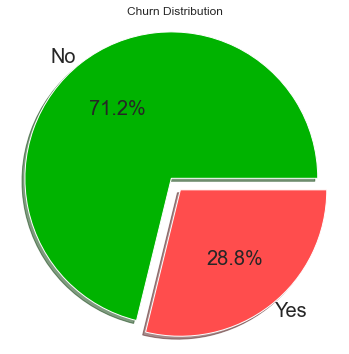

In [244]:
# Count values for 'Churn' column
Churn_types = df['Churn'].value_counts()

# Define custom labels (0 -> 'No', 1 -> 'Yes')
labels = ['No', 'Yes'] if 1 in Churn_types.index else ['Yes', 'No']
explode=[0.05,0.05]
colors = ['#00b300', '#ff4d4d']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(Churn_types, labels = labels, shadow = True, autopct='%1.1f%%', explode = explode, textprops={'fontsize': 20},  # Adjust font size of the labels
        labeldistance = 1.05, colors = colors)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


# Missing Data Check

In [7]:
def missingCheck(df):
    for col in df.columns.tolist():
        if df[col].isnull().sum() > 0:
            print("{} --> missing values : {}, dtype : {}".format(col, df[col].isnull().sum(), df[col].dtype))
        
missingCheck(df)

MonthlyRevenue --> missing values : 156, dtype : float64
MonthlyMinutes --> missing values : 156, dtype : float64
TotalRecurringCharge --> missing values : 156, dtype : float64
DirectorAssistedCalls --> missing values : 156, dtype : float64
OverageMinutes --> missing values : 156, dtype : float64
RoamingCalls --> missing values : 156, dtype : float64
PercChangeMinutes --> missing values : 367, dtype : float64
PercChangeRevenues --> missing values : 367, dtype : float64
ServiceArea --> missing values : 24, dtype : object
Handsets --> missing values : 1, dtype : float64
HandsetModels --> missing values : 1, dtype : float64
CurrentEquipmentDays --> missing values : 1, dtype : float64
AgeHH1 --> missing values : 909, dtype : float64
AgeHH2 --> missing values : 909, dtype : float64


In [8]:
df[df["ServiceArea"].isnull()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
2025,3015822,No,46.10,203.0,38.0,0.00,30.0,0.0,-1.0,15.8,...,0,5,No,0,30,No,1-Highest,Other,Crafts,Yes
2866,3022406,Yes,53.01,461.0,30.0,1.49,28.0,0.0,223.0,29.0,...,0,5,No,0,30,No,3-Good,Other,Other,Yes
6098,3047802,Yes,61.45,950.0,45.0,0.00,91.0,0.7,218.0,2.6,...,0,9,No,0,30,No,1-Highest,Rural,Professional,Yes
9326,3073410,Yes,109.29,1000.0,60.0,4.95,135.0,0.0,520.0,79.9,...,0,9,No,0,Unknown,No,1-Highest,Town,Professional,Yes
10460,3082514,No,76.52,441.0,73.0,0.25,22.0,6.0,-163.0,-34.3,...,0,0,No,0,30,No,4-Medium,Other,Other,Unknown
12709,3100222,No,79.92,318.0,75.0,0.99,0.0,0.0,-112.0,-0.7,...,0,9,No,0,60,No,1-Highest,Other,Other,No
12903,3101758,Yes,17.90,191.0,10.0,0.25,14.0,0.0,-63.0,-3.7,...,0,5,No,0,60,No,2-High,Other,Other,Unknown
13933,3109742,Yes,68.75,635.0,42.0,0.00,85.0,0.0,-75.0,-41.0,...,0,5,No,0,Unknown,No,2-High,Rural,Other,Unknown
16172,3126878,No,34.83,297.0,30.0,0.00,13.0,0.1,86.0,13.0,...,0,6,No,0,60,No,2-High,Suburban,Professional,Yes
16324,3128014,No,30.27,28.0,30.0,0.00,0.0,0.0,-22.0,-0.3,...,0,7,No,0,Unknown,No,3-Good,Other,Retired,Yes


ServiceArea is the only categorical column with missing data.

In [9]:
print(df[df['MonthlyRevenue'].isna()])

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
122       3000898   Yes             NaN             NaN                   NaN   
126       3000926   Yes             NaN             NaN                   NaN   
925       3007326   Yes             NaN             NaN                   NaN   
1454      3011438   Yes             NaN             NaN                   NaN   
2228      3017394   Yes             NaN             NaN                   NaN   
...           ...   ...             ...             ...                   ...   
51038     3399910    No             NaN             NaN                   NaN   
51042     3399958   Yes             NaN             NaN                   NaN   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCall

Here we can see that, along with MonthlyRevenue, where all the values MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls are missing also has PercChangeMinutes and PercChangeRevenues missing.

In [10]:
df[df['MonthlyRevenue'].notnull() & df['PercChangeMinutes'].isna()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
91,3000626,No,96.04,545.0,60.0,0.66,111.0,1.1,NaN,NaN,...,0,0,No,0,60,No,1-Highest,Town,Other,Unknown
461,3003534,No,52.85,662.0,57.0,0.33,0.0,5.0,NaN,NaN,...,0,6,No,0,150,Yes,1-Highest,Suburban,Other,Unknown
641,3005090,Yes,5.00,0.0,0.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,Unknown,No,3-Good,Suburban,Other,Yes
671,3005338,No,17.33,7.0,17.0,0.00,0.0,0.0,NaN,NaN,...,0,6,No,0,Unknown,No,1-Highest,Town,Professional,Yes
795,3006314,Yes,10.00,0.0,10.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,30,Yes,1-Highest,Suburban,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50550,3396018,Yes,30.00,25.0,30.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,Unknown,Yes,1-Highest,Suburban,Other,No
50765,3397770,Yes,34.65,150.0,33.0,1.32,0.0,0.0,NaN,NaN,...,0,0,No,0,Unknown,Yes,5-Low,Other,Other,Unknown
50897,3398798,No,23.33,1.0,45.0,0.00,0.0,0.0,NaN,NaN,...,0,7,No,0,Unknown,No,1-Highest,Suburban,Other,No
51000,3399610,No,52.99,809.0,70.0,0.00,0.0,0.0,NaN,NaN,...,0,9,No,0,30,No,3-Good,Other,Professional,No


From this we can conclude that, when MonthlyRevenue is not null then, only 211 values of PercChangeMinutes and PercChangeRevenues are missing.

In [11]:
df[df["Handsets"].isnull() & df["HandsetModels"].isnull() & df["CurrentEquipmentDays"].isnull()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
38702,3308798,No,76.98,0.0,87.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,2-High,Other,Other,Unknown


In [12]:
df["Handsets"].fillna(df["Handsets"].mean(), inplace = True)
df["HandsetModels"].fillna(df["HandsetModels"].mean(), inplace = True)
df["CurrentEquipmentDays"].fillna(df["CurrentEquipmentDays"].mean(), inplace = True)

In [13]:
df["ServiceArea"].fillna("Unknown", inplace = True)

In [14]:
df["DroppedCalls"] < 1

0         True
1         True
2         True
3        False
4         True
         ...  
51042    False
51043    False
51044    False
51045     True
51046    False
Name: DroppedCalls, Length: 51047, dtype: bool

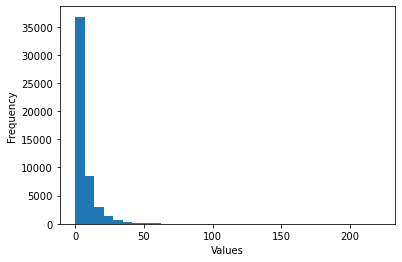

In [15]:
plt.hist(df["DroppedCalls"], bins = 32)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [16]:
df.iloc[:,10:29].describe()

,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751
std,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331160,0.905923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000
25%,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000
75%,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000
max,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000


In [17]:
df.iloc[:, 29:].describe()

,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,51047.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,253.799496,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


All of these variables appear to contain outliers (maximum value is higher than 1.5 times the IQR above the 75th percentile)

Plotting Histograms to understand data

In [18]:
cols_of_interest = ['DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
                    'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
                    'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                    'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
                    'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
                    'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted',
                    'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']

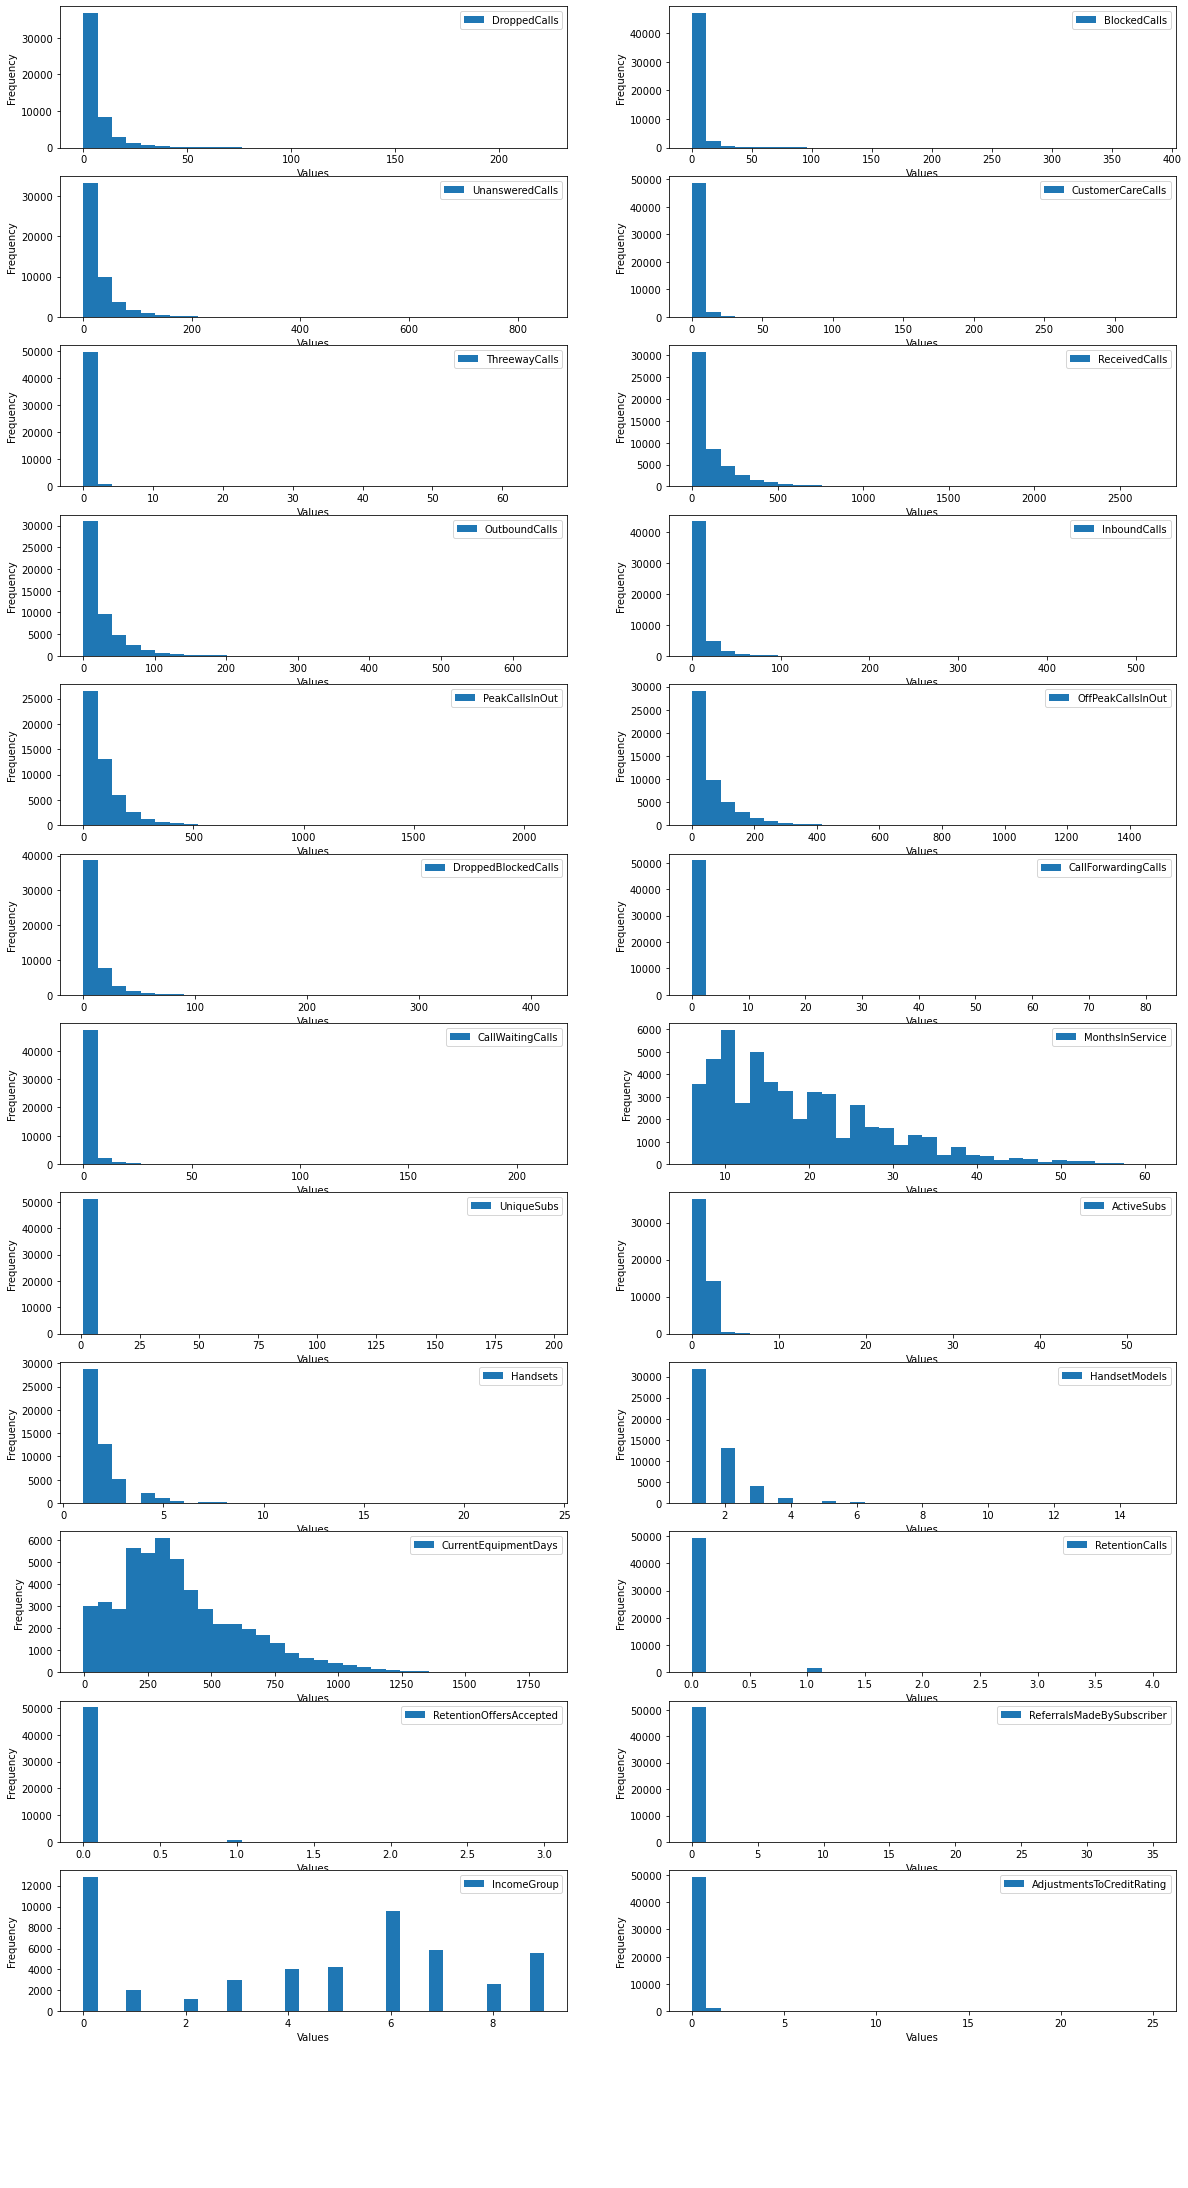

In [19]:
nrows = 13
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,40))

def plot_hist(nrows, ncols, df, cols_of_interest):
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            x = axes[i][j]
            
            if index < len(cols_of_interest):
                x.hist(df[cols_of_interest[index]], bins = 32, label = '{}'.format(cols_of_interest[index]))
                x.set_xlabel("Values")
                x.set_ylabel("Frequency")
                x.legend()
                
            else:
                x.set_axis_off()
                
            index += 1
    plt.show()

plot_hist(nrows, ncols, df, cols_of_interest)
        

The income group variable should be treated as a categorical variable rather than a numerical one. Additionally, all of these columns exhibit a strong right skew. To mitigate this skewness, I will apply a log transformation to these columns in order to "stretch out" the tails of the distributions.

In [20]:
cols_of_interest.remove("IncomeGroup")

In [21]:
#cols_of_interest

In [22]:
df["CurrentEquipmentDays"] = df["CurrentEquipmentDays"].clip(lower = 0) #clip makes the negative values to 0 i.e. clip to 0

### Transforming Distibutions

In [23]:
transformed_data = df
for col in cols_of_interest:
    if col == "MonthsinService":
        pass
    elif col == "CurrentEquipmentDays":
        transformed_data[col] = np.sqrt(transformed_data[col])
    else:
        transformed_data[col] = np.arcsinh(transformed_data[col])

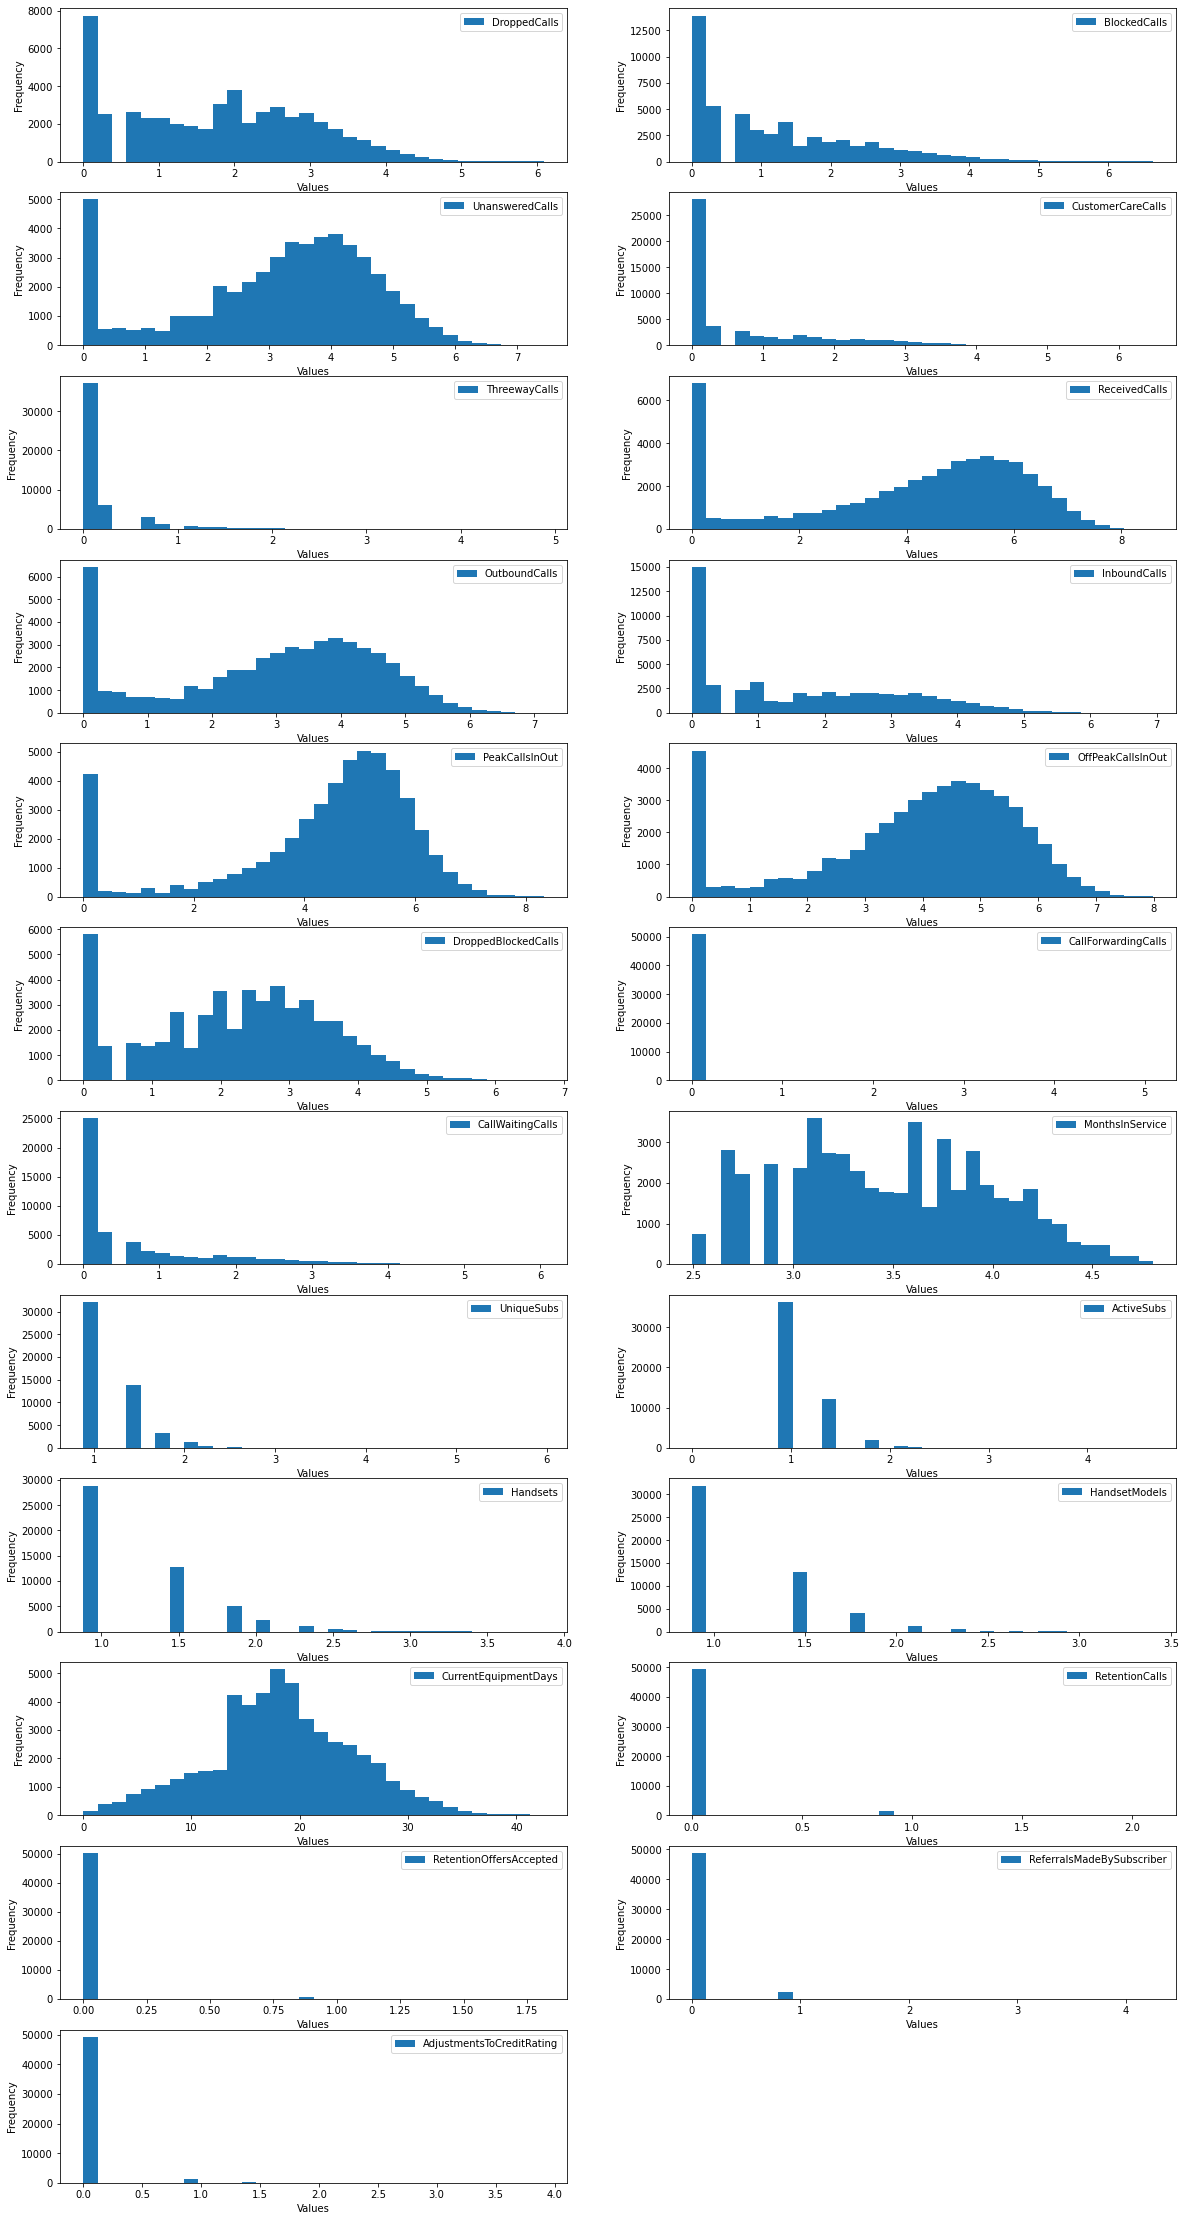

In [24]:
ncols = 2
nrows = 12
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,40))
plot_hist(nrows, ncols, transformed_data, cols_of_interest)

In [25]:
high_freq_cols_names = ['BlockedCalls', 'CustomerCareCalls', 'ThreewayCalls', 
                  'CallForwardingCalls', 'CallWaitingCalls','UniqueSubs', 
                  'ActiveSubs', 'Handsets', 'HandsetModels', 'RetentionCalls', 
                  'ReferralsMadeBySubscriber', 'RetentionOffersAccepted', 'AdjustmentsToCreditRating']

for col in high_freq_cols_names:
    print(df[col].value_counts())

0.000000    13912
0.295673     5254
0.652667     4526
0.881374     2966
1.078451     2633
            ...  
5.605816        1
5.236470        1
6.323286        1
4.856767        1
5.741089        1
Name: BlockedCalls, Length: 373, dtype: int64
0.000000    28020
0.295673     3613
0.652667     2736
0.881374     1785
1.078451     1616
            ...  
4.499933        1
4.285155        1
4.521907        1
4.399526        1
4.723921        1
Name: CustomerCareCalls, Length: 185, dtype: int64
0.000000    37133
0.295673     6109
0.652667     3183
0.881374     1388
1.078451      896
            ...  
4.025670        1
3.544688        1
3.784706        1
3.527224        1
3.584290        1
Name: ThreewayCalls, Length: 78, dtype: int64
0.000000    50813
0.295673      101
0.652667       50
0.881374       18
1.443635       13
1.078451       11
1.570279        8
1.300820        5
2.019261        3
1.719052        2
2.094713        2
2.312438        2
1.818446        1
2.859757        1
3.179785   

In [26]:
#vc = transformed_data['AdjustmentsToCreditRating'].value_counts()

In [27]:
for col in high_freq_cols_names:
    transformed_data[col] = np.sinh(transformed_data[col])
    value_counts = transformed_data[col].value_counts()
    transformed_data[col] = transformed_data[col].apply(lambda x: str(x) if value_counts[x] > 10000 else 'Other' )

In [28]:
transformed_data["AdjustmentsToCreditRating"]

0          0.0
1          0.0
2          0.0
3          0.0
4        Other
         ...  
51042      0.0
51043    Other
51044    Other
51045      0.0
51046    Other
Name: AdjustmentsToCreditRating, Length: 51047, dtype: object

In [29]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  object 
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  obj

In [30]:
transformed_data['ServiceArea'] = transformed_data.ServiceArea.str[:3]

Changing ServiceArea to just cities

In [31]:
cat_cols_names = list(transformed_data.select_dtypes(include=['object']).columns)
cat_cols_names

['Churn',
 'BlockedCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'UniqueSubs',
 'ActiveSubs',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [32]:
for col in cat_cols_names:
    if col in high_freq_cols_names:
        cat_cols_names.remove(col)

In [33]:
cat_cols_names

['Churn',
 'CustomerCareCalls',
 'CallForwardingCalls',
 'UniqueSubs',
 'ServiceArea',
 'HandsetModels',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [34]:
high_freq_cols_names

['BlockedCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'RetentionCalls',
 'ReferralsMadeBySubscriber',
 'RetentionOffersAccepted',
 'AdjustmentsToCreditRating']

Don't know, for some unknown reason the above remove operation is not able to remove CustomerCareCalls, UniqueSubs, HandsetModels, RetentionOffersAccepted and CallForwardingCalls from cat_cols.

In [35]:
cat_cols_names.remove('CustomerCareCalls')
cat_cols_names.remove('UniqueSubs')
cat_cols_names.remove('HandsetModels')
cat_cols_names.remove('RetentionOffersAccepted')
cat_cols_names.remove('CallForwardingCalls')

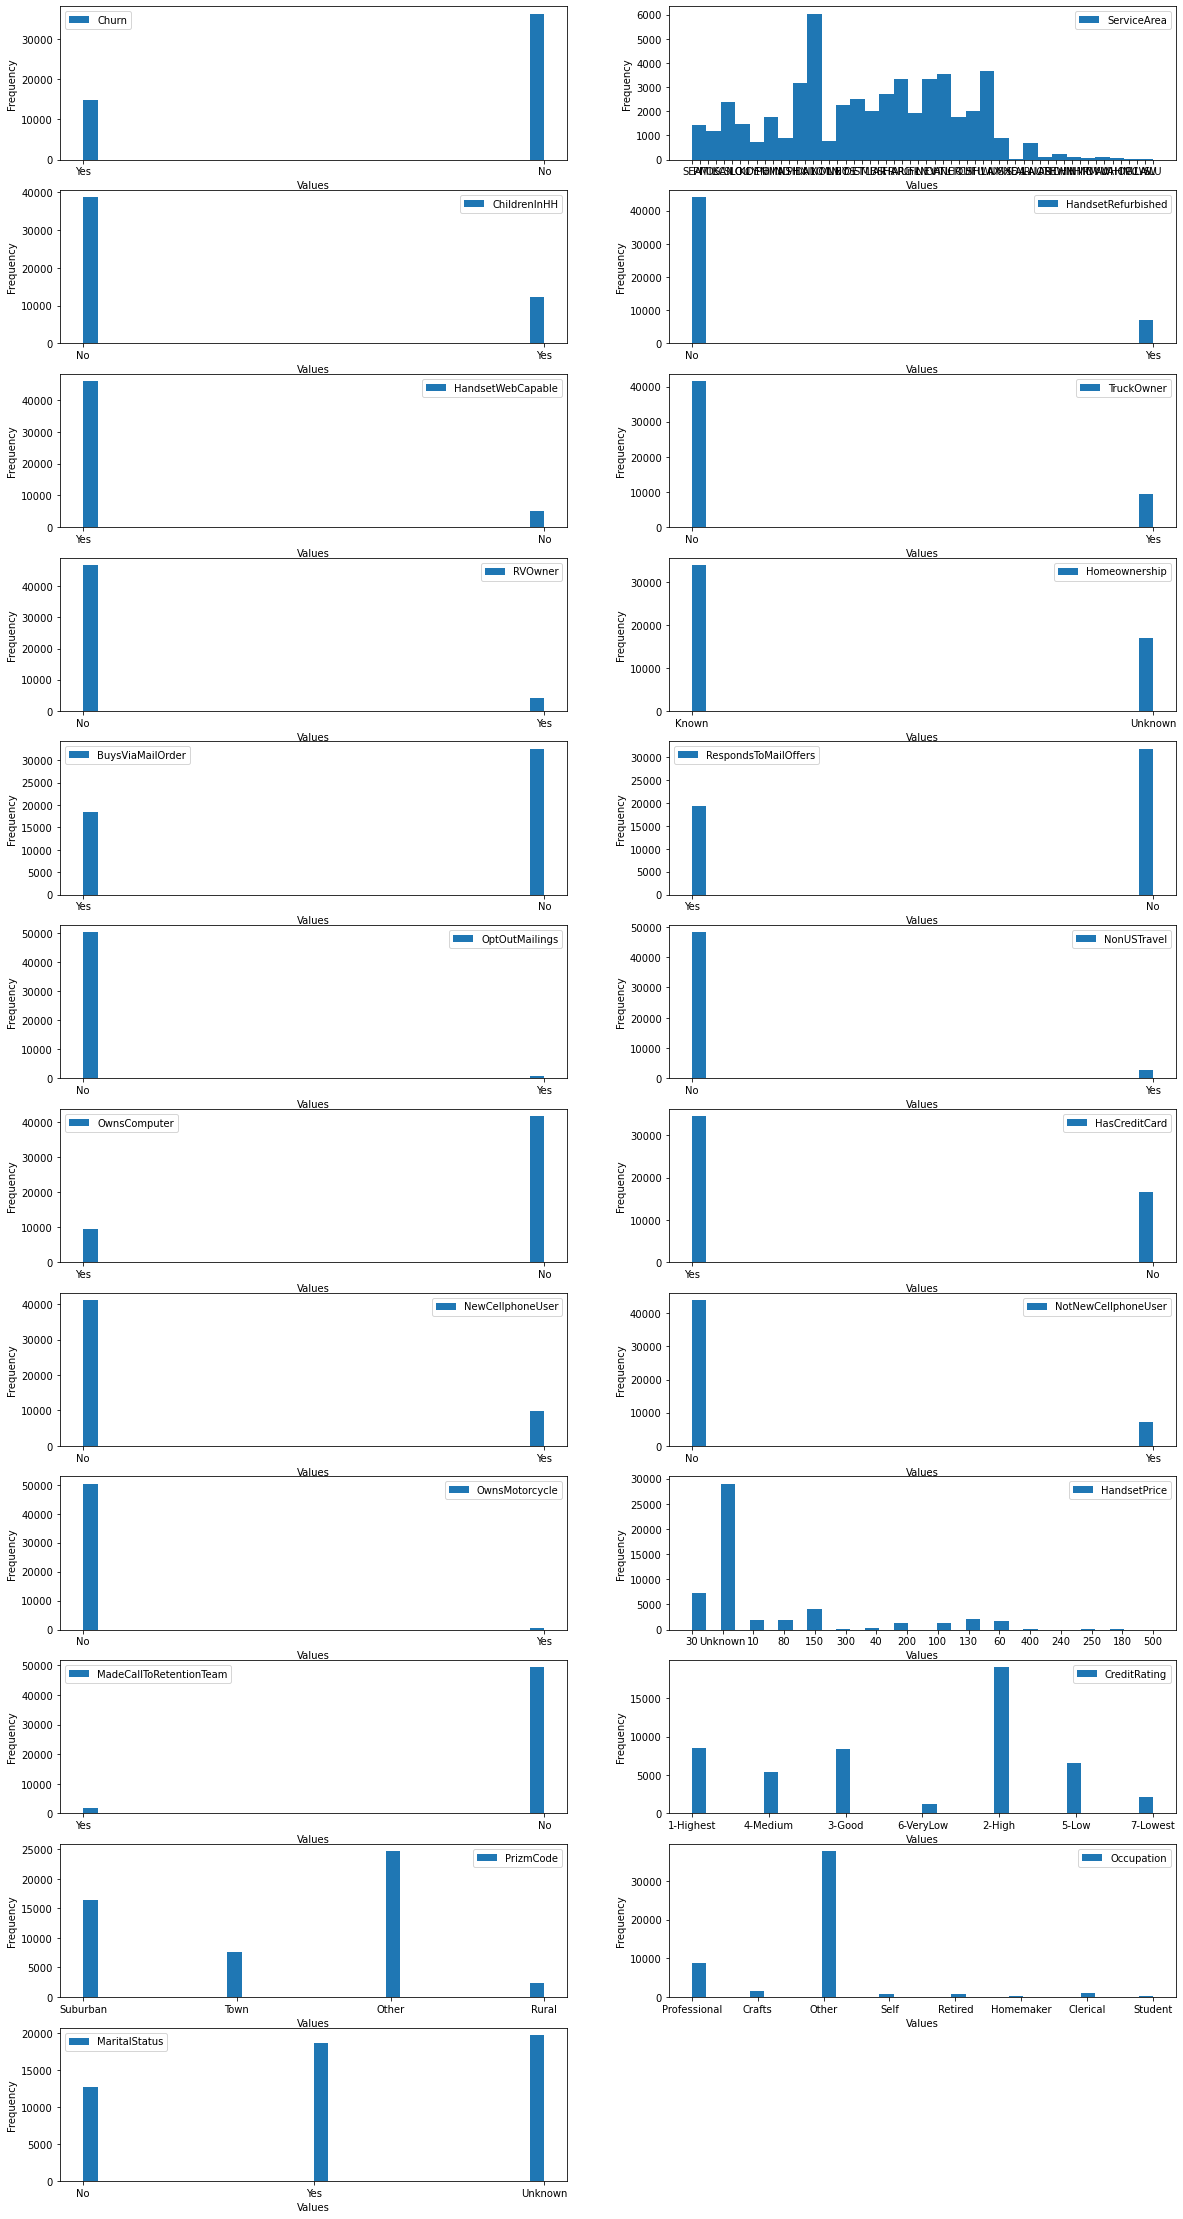

In [36]:
ncols = 2
nrows = 12
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,40))
plot_hist(nrows, ncols, transformed_data, cat_cols_names)

In [37]:
cols_to_map = ["Churn", "ChildrenInHH", "HandsetRefurbished", 
               "HandsetWebCapable", "TruckOwner", "RVOwner",
              "BuysViaMailOrder", "RespondsToMailOffers", "OptOutMailings",
              "NonUSTravel", "OwnsComputer", "HasCreditCard",
              "NewCellphoneUser", "NotNewCellphoneUser", "OwnsMotorcycle"]

transformed_data[cols_to_map] = transformed_data[cols_to_map].replace({'Yes':1, 'No':0})
transformed_data["Homeownership"] = transformed_data["Homeownership"].replace({'Known': 1, 'Unknown': 0})

In [38]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  object 
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  obj

In [39]:
#ohe_cols to One hot Encode
transformed_data.drop("HandsetPrice", axis = 'columns')
ohe_cols = ['PrizmCode', 'Occupation', 'MaritalStatus', 'ServiceArea', 'Homeownership']

In [40]:
transformed_data['CreditRating'] = transformed_data.CreditRating.str[0].astype(float)

In [41]:
def OneHotEncoding(df, cols):
    encoder = OneHotEncoder(sparse = False, drop = None)
    encoded_data = encoder.fit_transform(df[cols])
    fitted_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(cols))
    transformed_data = pd.concat([df, fitted_data], axis = 1)
    return transformed_data

transformed_data = OneHotEncoding(transformed_data, ohe_cols)

In [42]:
transformed_data = transformed_data.drop(ohe_cols, axis = 'columns')

In [43]:
for i in transformed_data.columns:
    print(i)

CustomerID
Churn
MonthlyRevenue
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
RoamingCalls
PercChangeMinutes
PercChangeRevenues
DroppedCalls
BlockedCalls
UnansweredCalls
CustomerCareCalls
ThreewayCalls
ReceivedCalls
OutboundCalls
InboundCalls
PeakCallsInOut
OffPeakCallsInOut
DroppedBlockedCalls
CallForwardingCalls
CallWaitingCalls
MonthsInService
UniqueSubs
ActiveSubs
Handsets
HandsetModels
CurrentEquipmentDays
AgeHH1
AgeHH2
ChildrenInHH
HandsetRefurbished
HandsetWebCapable
TruckOwner
RVOwner
BuysViaMailOrder
RespondsToMailOffers
OptOutMailings
NonUSTravel
OwnsComputer
HasCreditCard
RetentionCalls
RetentionOffersAccepted
NewCellphoneUser
NotNewCellphoneUser
ReferralsMadeBySubscriber
IncomeGroup
OwnsMotorcycle
AdjustmentsToCreditRating
HandsetPrice
MadeCallToRetentionTeam
CreditRating
PrizmCode_Other
PrizmCode_Rural
PrizmCode_Suburban
PrizmCode_Town
Occupation_Clerical
Occupation_Crafts
Occupation_Homemaker
Occupation_Other
Occupation_Professional
Occupation_R

In [44]:
#transformed_data = transformed_data.drop('PrizmCode', axis = 'columns')
#transformed_data = transformed_data.drop('Occupation', axis = 'columns')
#transformed_data = transformed_data.drop('Homeownership', axis = 'columns')
#transformed_data = transformed_data.drop('ServiceArea', axis = 'columns')


In [45]:
transformed_data.columns[20:80]

Index(['DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode_Other', 'PrizmCode_Rural',
       'PrizmCode_Suburban', 'PrizmCode_Town', 'Occupation_Clerical',
       'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other',
       'Occupation_Professional', 'Occupation_Retired', 'Occupation_Self',
       'Occupation_Student', 'MaritalStatus_No', 'Marital

In [46]:
missingCheck(transformed_data)

MonthlyRevenue --> missing values : 156, dtype : float64
MonthlyMinutes --> missing values : 156, dtype : float64
TotalRecurringCharge --> missing values : 156, dtype : float64
DirectorAssistedCalls --> missing values : 156, dtype : float64
OverageMinutes --> missing values : 156, dtype : float64
RoamingCalls --> missing values : 156, dtype : float64
PercChangeMinutes --> missing values : 367, dtype : float64
PercChangeRevenues --> missing values : 367, dtype : float64
AgeHH1 --> missing values : 909, dtype : float64
AgeHH2 --> missing values : 909, dtype : float64


In [47]:
label_encoder = LabelEncoder()
#for col in high_freq_cols_names:
 # if len(transformed_data[col].unique()) == 2:
  #  transformed_data[col] = label_encoder.fit_transform(transformed_data[col])
  #else:
  #  transformed_data = ohe_cat(col, transformed_data)

#transformed_data
for col in high_freq_cols_names:
    if len(transformed_data[col].unique()) <= 4:
        transformed_data[col] = label_encoder.fit_transform(transformed_data[col])
        

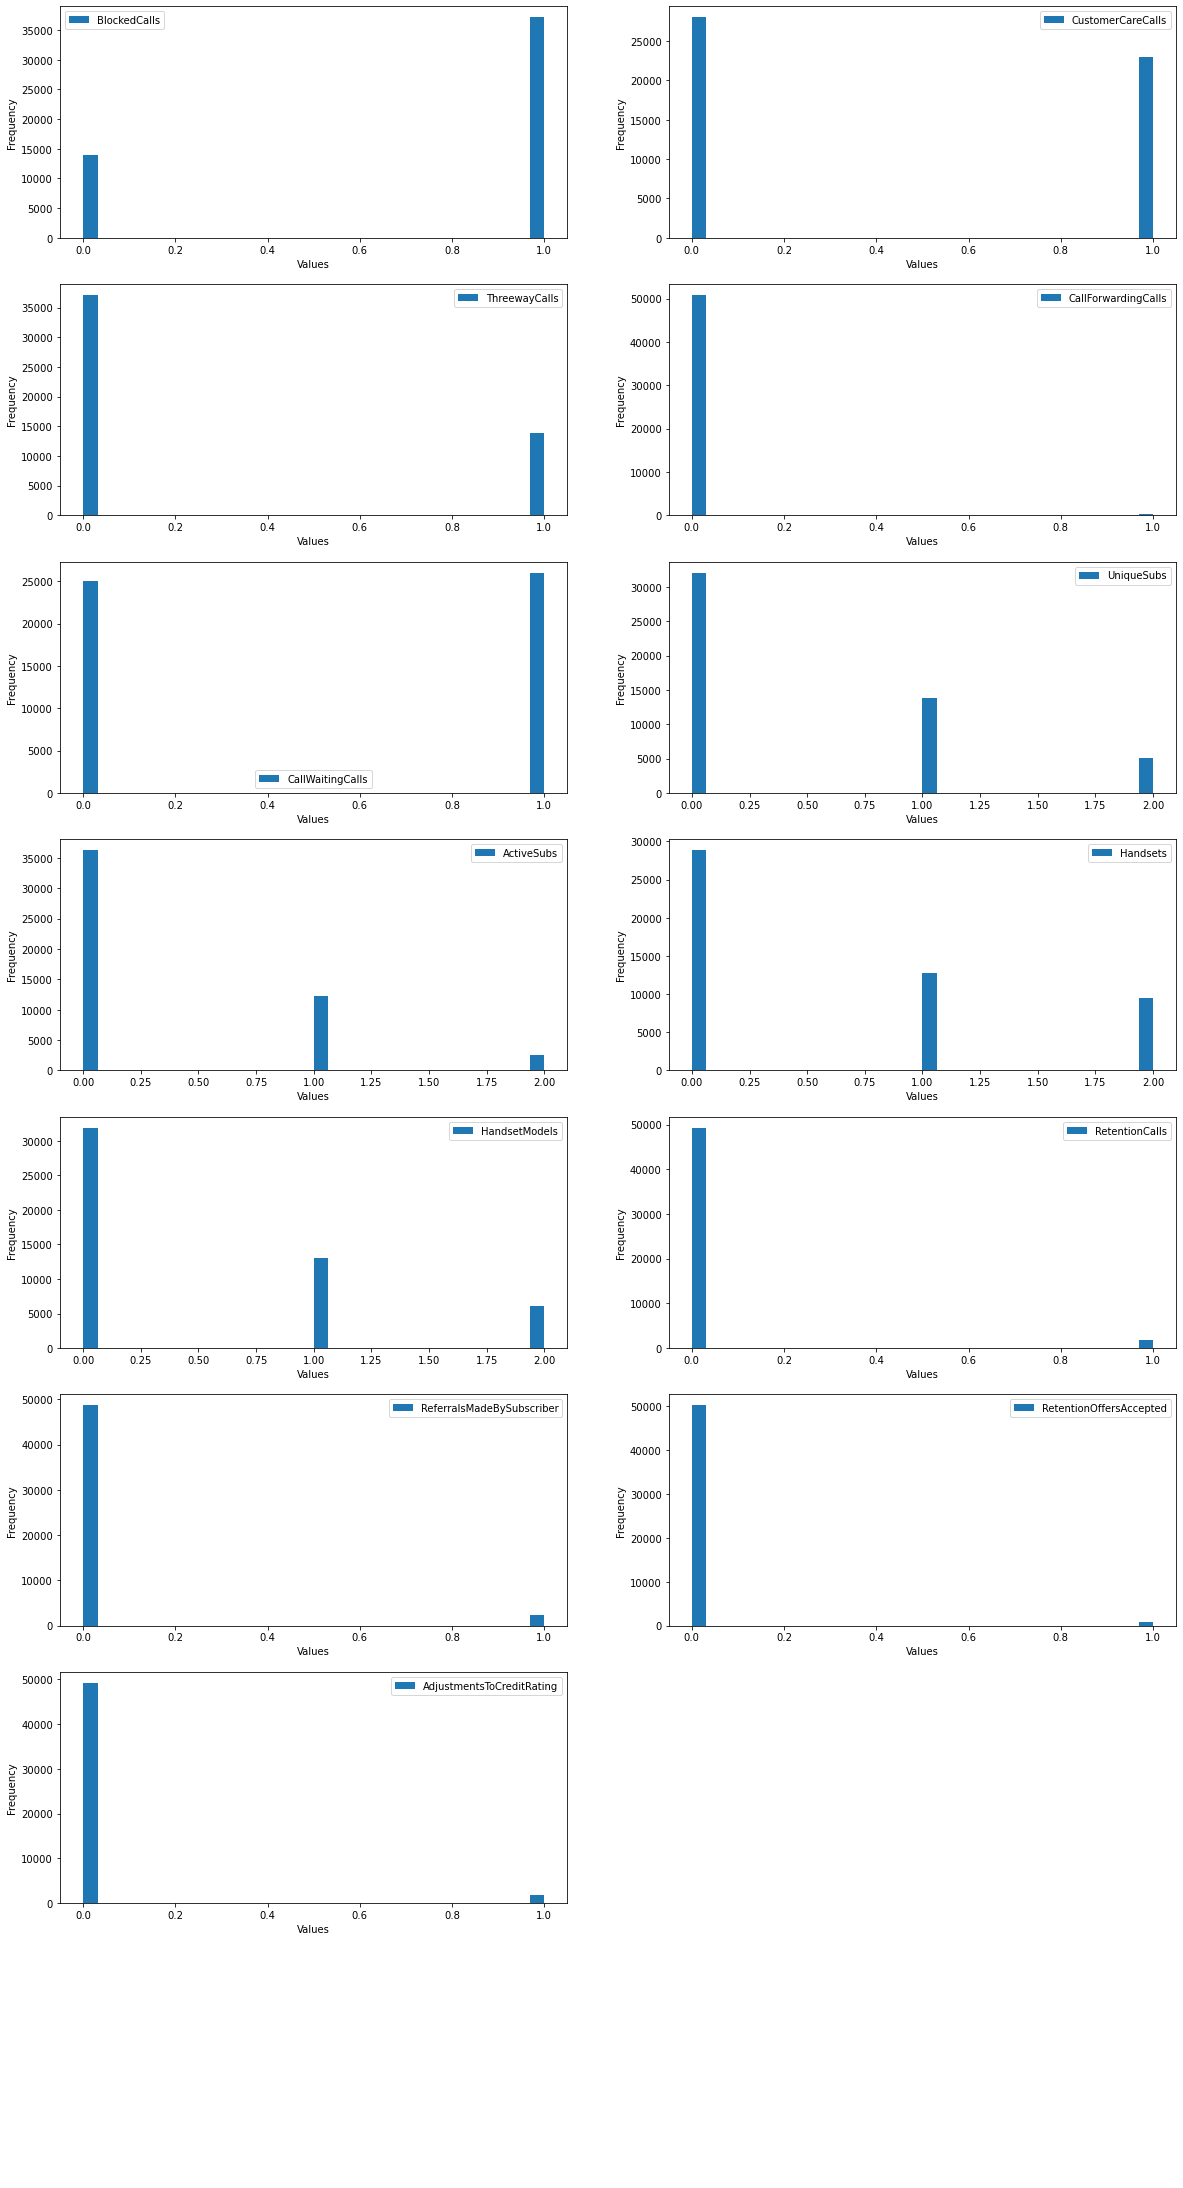

In [48]:
ncols = 2
nrows = 8
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,40))
plot_hist(nrows, ncols, transformed_data, high_freq_cols_names)

In [49]:
transformed_data.set_index('CustomerID', inplace=True)
ds_col_names = list(transformed_data.keys())
ds_col_names

['Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'HandsetPrice',
 'MadeCallToRetentionTeam'

In [50]:
missingCheck(transformed_data)

MonthlyRevenue --> missing values : 156, dtype : float64
MonthlyMinutes --> missing values : 156, dtype : float64
TotalRecurringCharge --> missing values : 156, dtype : float64
DirectorAssistedCalls --> missing values : 156, dtype : float64
OverageMinutes --> missing values : 156, dtype : float64
RoamingCalls --> missing values : 156, dtype : float64
PercChangeMinutes --> missing values : 367, dtype : float64
PercChangeRevenues --> missing values : 367, dtype : float64
AgeHH1 --> missing values : 909, dtype : float64
AgeHH2 --> missing values : 909, dtype : float64


In [57]:
# Select columns with dtype 'object'
#object_columns = transformed_data.select_dtypes(include=['object']).columns

# Display the list of object columns
#print("Object Columns:", object_columns)

# Show the first few rows of these columns for inspection
#print(transformed_data[object_columns].head())

In [51]:
transformed_data = transformed_data.drop(['HandsetPrice', 'MadeCallToRetentionTeam'], axis=1)
len(ds_col_names)

127

In [52]:
ds_col_names.remove("HandsetPrice")
ds_col_names.remove("MadeCallToRetentionTeam")

In [60]:
transformed_data

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ServiceArea_SFR,ServiceArea_SFU,ServiceArea_SHE,ServiceArea_SLC,ServiceArea_SLU,ServiceArea_STL,ServiceArea_Unk,ServiceArea_VAH,Homeownership_0,Homeownership_1
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.652667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.295673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,4.644483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.926040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,3.509451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.965687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
imputer = KNNImputer()
imputed_set = pd.DataFrame(imputer.fit_transform(transformed_data), columns=ds_col_names, index=transformed_data.index)
imputed_set

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ServiceArea_SFR,ServiceArea_SFU,ServiceArea_SHE,ServiceArea_SLC,ServiceArea_SLU,ServiceArea_STL,ServiceArea_Unk,ServiceArea_VAH,Homeownership_0,Homeownership_1
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1.0,24.000,219.0,22.0,0.250,0.0,0.00,-157.0,-19.00,0.652667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000010,1.0,16.990,10.0,17.0,0.000,0.0,0.00,-4.0,0.00,0.295673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000014,0.0,38.000,8.0,38.0,0.000,0.0,0.00,-2.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3000022,0.0,82.280,1312.0,75.0,1.240,0.0,0.00,157.0,8.10,4.644483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000026,1.0,17.140,0.0,17.0,0.000,0.0,0.00,0.0,-0.20,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,65.896,443.4,40.0,0.794,85.2,0.00,-33.0,-6.88,2.926040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3399974,0.0,95.170,1745.0,85.0,0.990,45.0,4.70,122.0,15.90,3.509451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3399978,1.0,160.352,2499.0,116.8,2.476,146.8,1.92,-389.0,-69.58,4.965687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
imputed_set.iloc[:,1:24].describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,...,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,58.799337,525.073634,46.808659,0.894441,39.978110,1.234204,-11.535969,-1.192488,1.790513,0.727467,...,4.070208,2.958474,1.655370,4.360382,3.907255,2.262257,0.004584,0.509687,3.496235,0.470625
std,44.469949,529.659812,23.835702,2.225760,96.470175,9.803491,256.726429,39.457708,1.228089,0.445267,...,2.171860,1.647451,1.521072,1.733100,1.767333,1.312294,0.067551,0.499911,0.510161,0.669637
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.491780,0.000000
25%,33.590000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000,0.652667,0.000000,...,2.813012,1.909274,0.000000,3.829114,3.093102,1.300820,0.000000,0.000000,3.093102,0.000000
50%,48.410000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,1.818446,1.000000,...,4.659748,3.311872,1.443635,4.820347,4.268494,2.369637,0.000000,1.000000,3.466711,0.000000
75%,71.015000,722.000000,60.000000,0.990000,41.000000,0.300000,65.000000,1.600000,2.738558,1.000000,...,5.726858,4.219724,2.926040,5.491431,5.178439,3.204395,0.000000,1.000000,3.871635,1.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,6.094477,1.000000,...,8.591335,7.161312,6.945630,8.338401,7.989357,6.713444,1.000000,1.000000,4.804088,2.000000


In [55]:
imputed_set.iloc[:,25:50].describe()

,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,...,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,CreditRating
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,...,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,0.620644,0.495700,18.322100,31.015351,20.930817,0.242287,0.138911,0.902031,0.186554,0.081356,...,0.675907,0.034184,0.017259,0.192450,0.137814,0.046702,4.324524,0.013301,0.036006,2.886967
std,0.779201,0.700339,6.697083,22.067089,23.794600,0.428471,0.345857,0.297275,0.389557,0.273384,...,0.468040,0.181704,0.130235,0.394228,0.344708,0.211002,3.138236,0.114563,0.186307,1.583360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,14.317821,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,18.138357,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,22.693611,48.000000,42.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000
max,2.000000,2.000000,42.567593,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,7.000000


In [56]:
imputed_set.iloc[:,51:75].describe()

,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,...,ServiceArea_AIR,ServiceArea_APC,ServiceArea_ATH,ServiceArea_ATL,ServiceArea_AWI,ServiceArea_BIR,ServiceArea_BOS,ServiceArea_CHI,ServiceArea_DAL,ServiceArea_DEN
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,...,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,0.047505,0.320842,0.148667,0.019316,0.029757,0.003076,0.737301,0.171509,0.014359,0.017219,...,0.012635,0.047329,0.000568,0.035301,0.001430,0.002233,0.030286,0.039473,0.046878,0.014183
std,0.212719,0.466805,0.355763,0.137633,0.169918,0.055373,0.440105,0.376956,0.118968,0.130089,...,0.111696,0.212344,0.023828,0.184541,0.037789,0.047205,0.171374,0.194720,0.211380,0.118246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Some of these columns appear to contain outliers (maximum value is higher than 1.5 times the IQR above the 75th percentile). OverageMinutes appears to be skewed to the right (range between 75th percentile and median is significantly higher than range between median and 25th percentile)

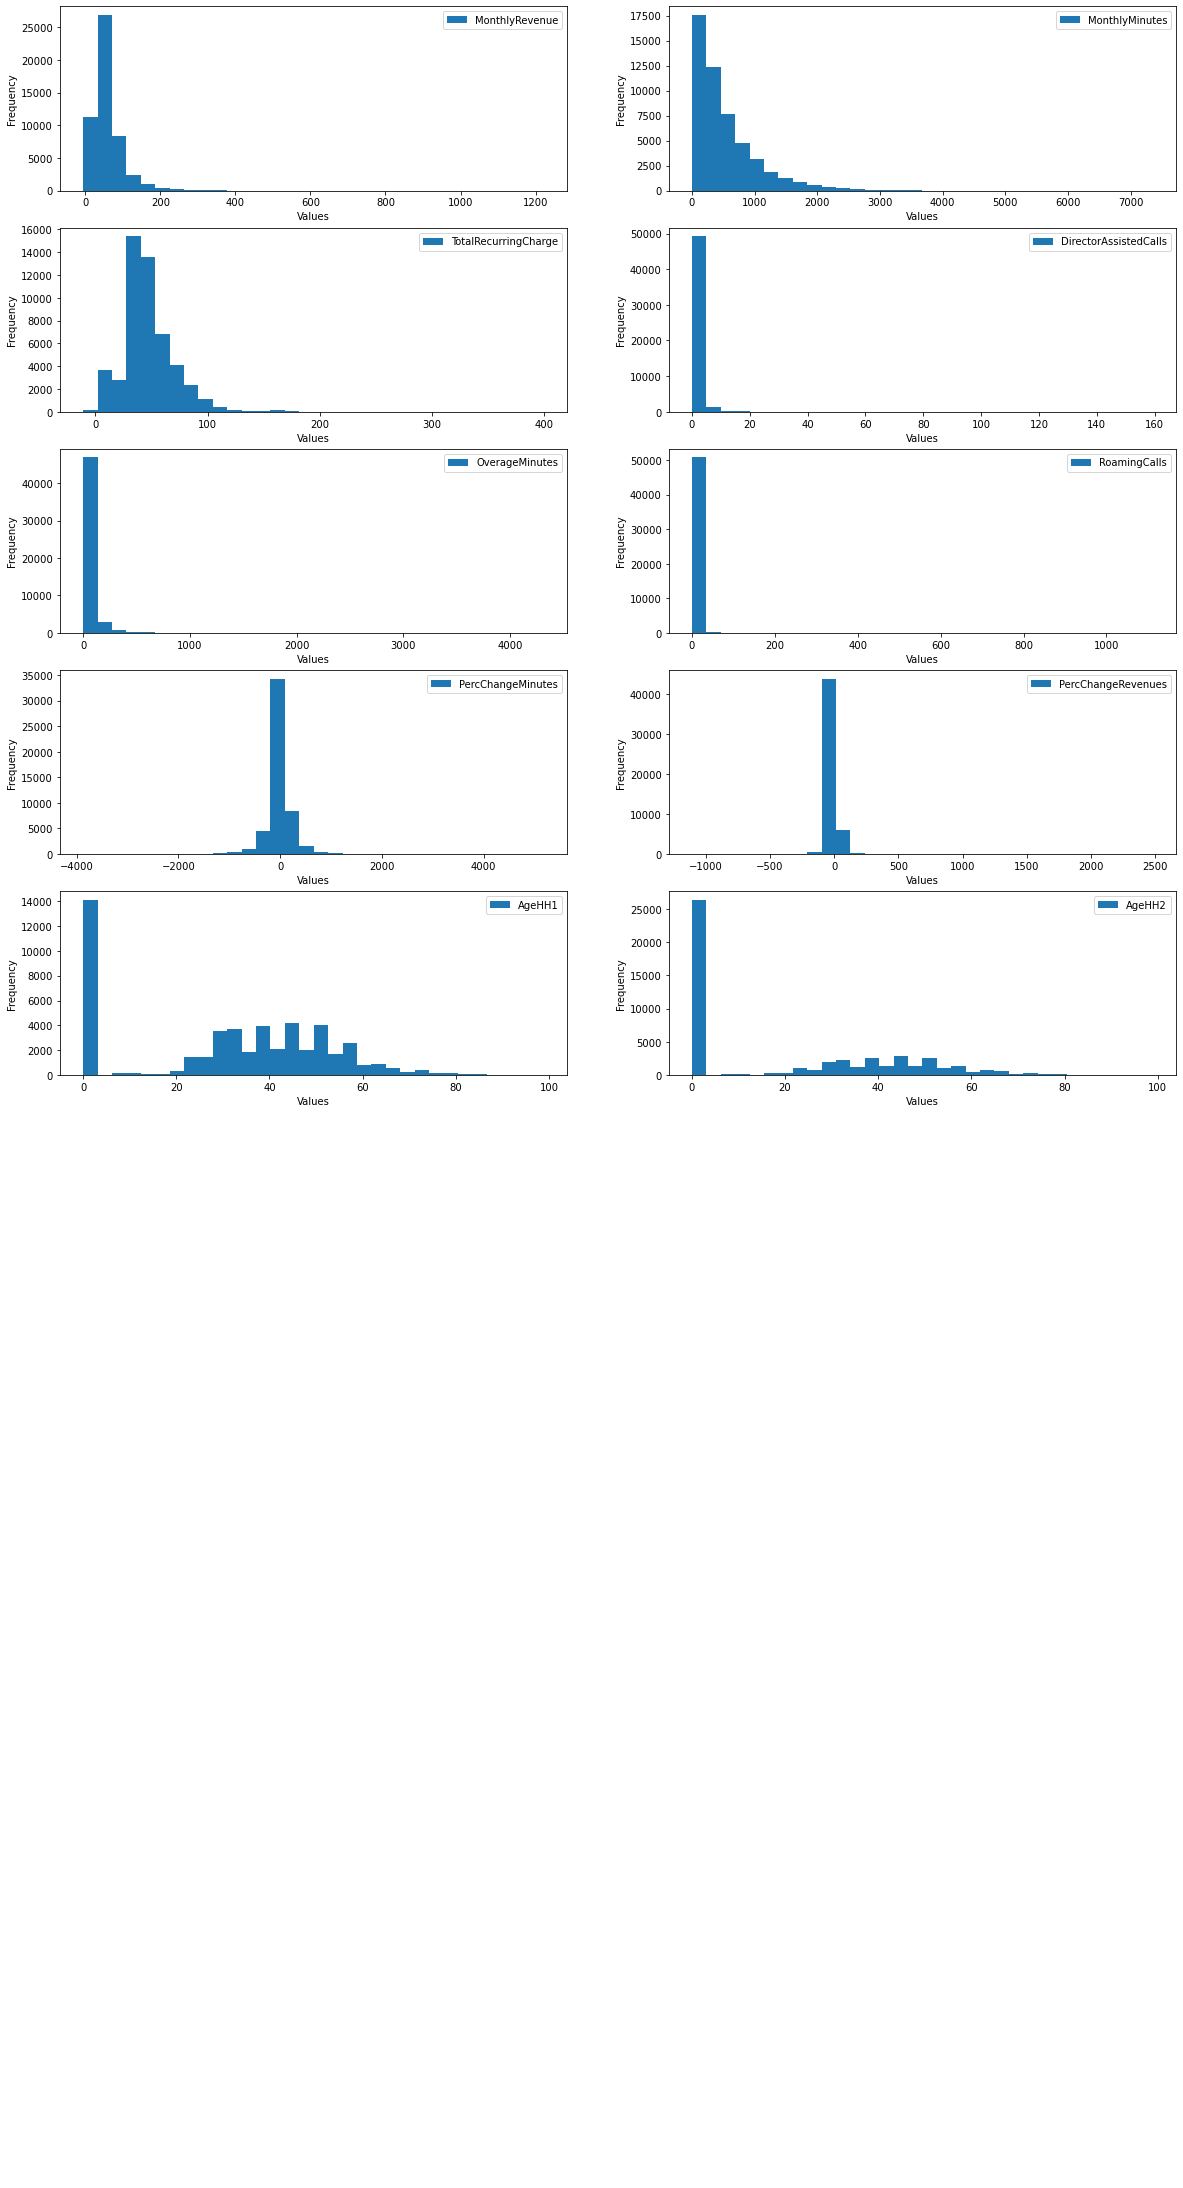

In [57]:
last_col_names = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2']

ncols = 2
nrows = 10
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,40))
plot_hist(nrows, ncols, imputed_set, last_col_names)



In [58]:
imputed_set = imputed_set.drop(['AgeHH1','AgeHH2'], axis='columns')
last_col_names.remove('AgeHH1')
last_col_names.remove('AgeHH2')
last_col_names.remove('PercChangeMinutes')
last_col_names.remove('PercChangeRevenues')

In [59]:
last_col_names

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls']

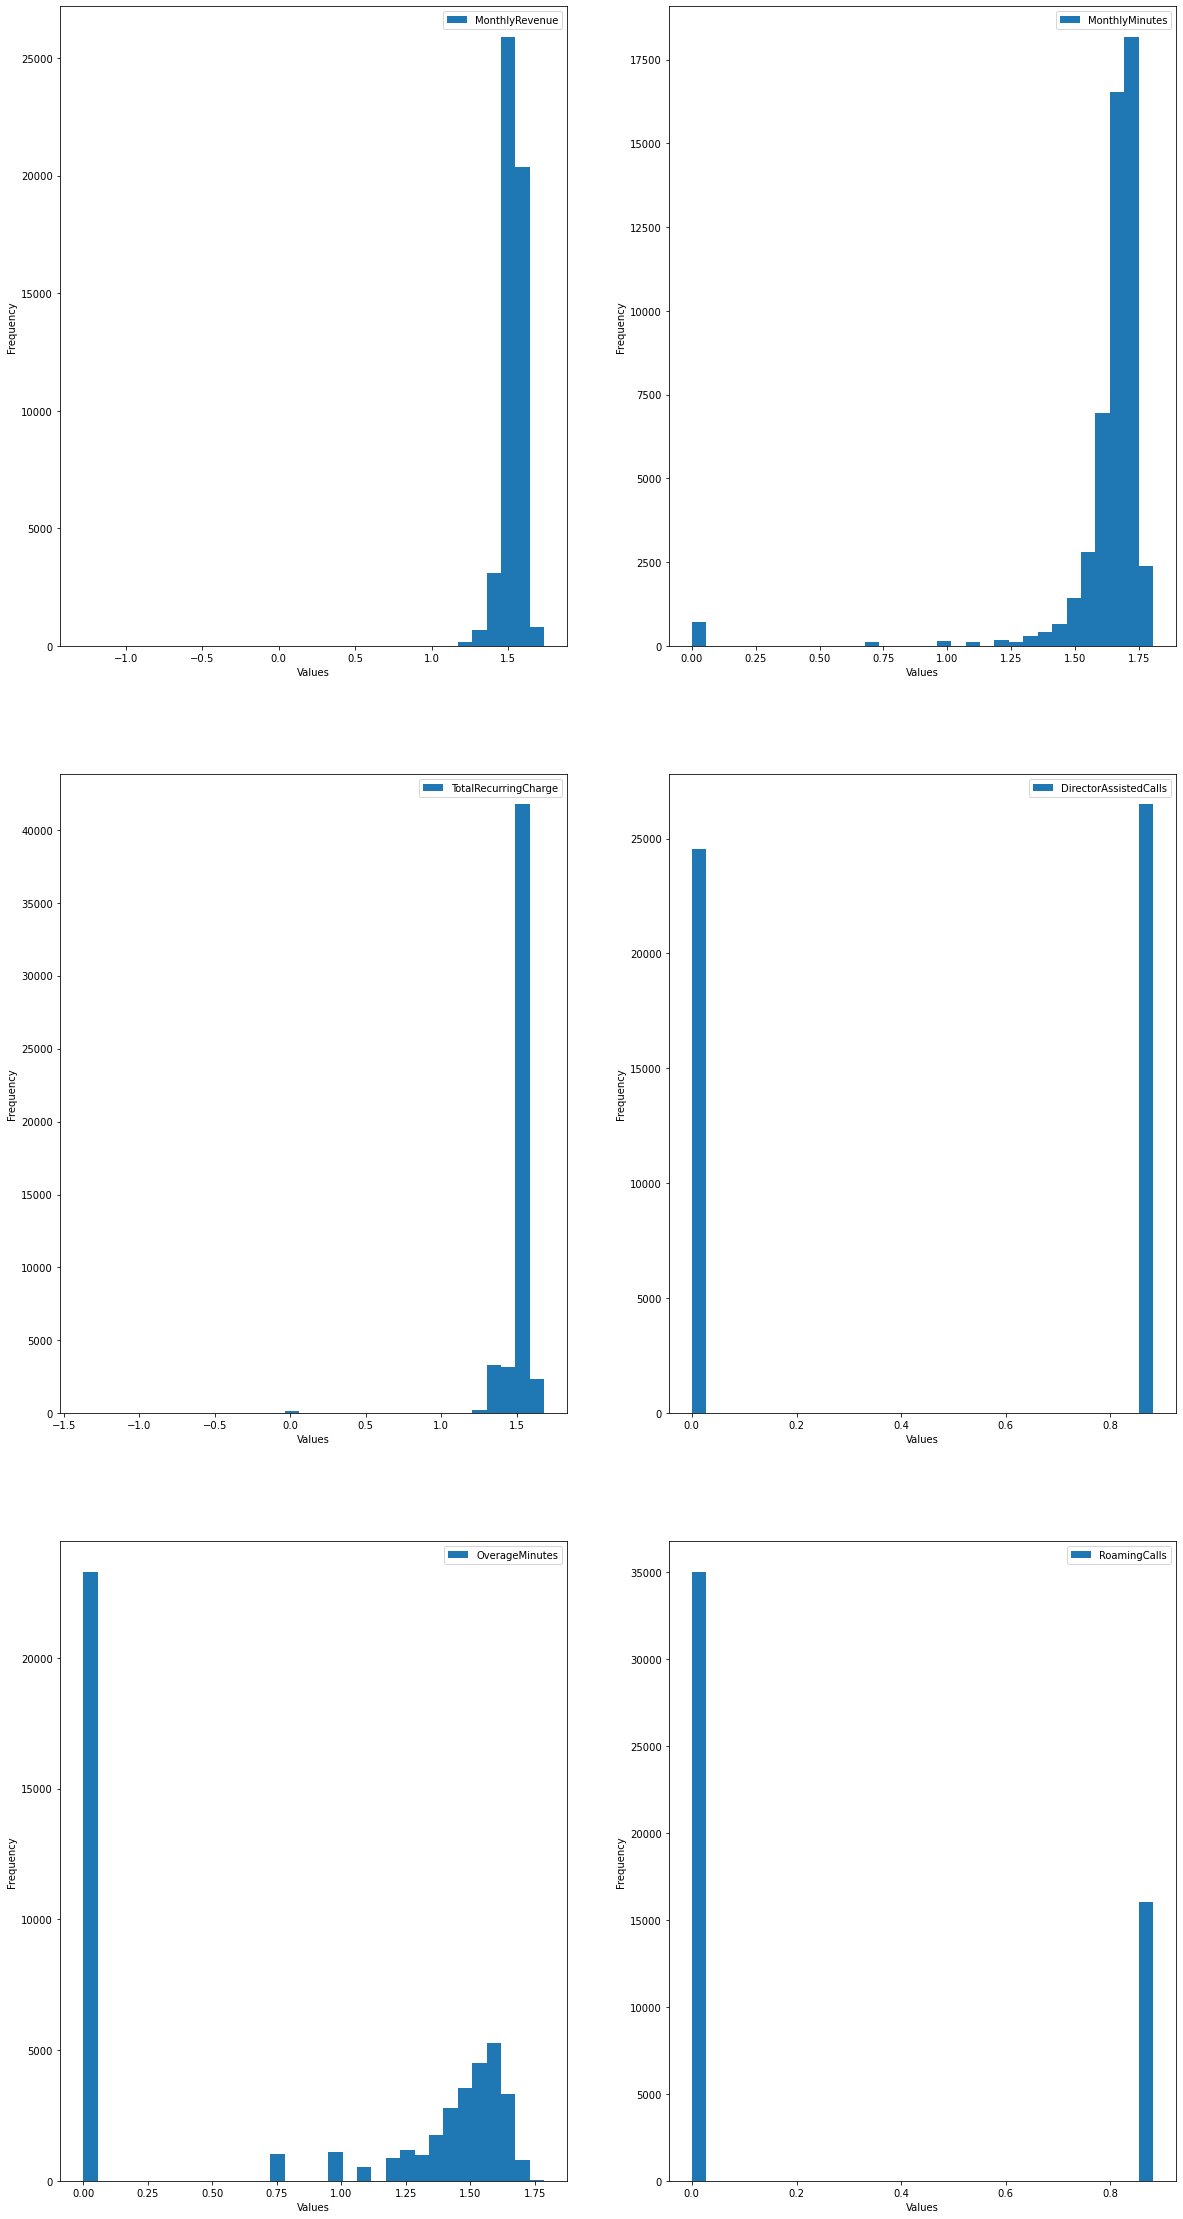

In [96]:
imputed_transformed_set = imputed_set
for col in last_col_names:
    imputed_transformed_set[col] = imputed_transformed_set[col].transform(lambda x: np.arcsinh(x))

ncols = 2
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
plot_hist(nrows, ncols, imputed_transformed_set, last_col_names)


In [97]:
missingCheck(imputed_transformed_set)
imputed_transformed_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51047 entries, 3000002 to 3399994
Columns: 123 entries, Churn to Homeownership_1
dtypes: float64(123)
memory usage: 50.8 MB


In [102]:
missingCheck(imputed_transformed_set)

In [99]:
for col in ['RoamingCalls', 'DirectorAssistedCalls']:
    imputed_transformed_set[col] = imputed_transformed_set[col].transform(lambda x: np.sinh(x)) #Reversing the transformation
    imputed_transformed_set[col] = imputed_transformed_set[col].transform(lambda x: str(x) if imputed_transformed_set[col].value_counts()[x] > 10000 else 'Other')
    if len(imputed_transformed_set[col].unique()) == 2:
        imputed_transformed_set[col] = label_encoder.fit_transform(imputed_transformed_set[col])


imputed_transformed_set


,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ServiceArea_SFR,ServiceArea_SFU,ServiceArea_SHE,ServiceArea_SLC,ServiceArea_SLU,ServiceArea_STL,ServiceArea_Unk,ServiceArea_VAH,Homeownership_0,Homeownership_1
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1.0,1.471504,1.649164,1.461879,1,0.000000,0,-157.0,-19.00,0.652667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000010,1.0,1.431501,1.359093,1.431573,0,0.000000,0,-4.0,0.00,0.295673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000014,0.0,1.518010,1.323557,1.518010,0,0.000000,0,-2.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3000022,0.0,1.583161,1.739869,1.576057,1,0.000000,0,157.0,8.10,4.644483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3000026,1.0,1.432581,0.000000,1.431573,0,0.000000,0,0.0,-0.20,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,1.565838,1.688625,1.522797,1,1.585791,0,-33.0,-6.88,2.926040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3399974,0.0,1.593985,1.751829,1.585615,1,1.533516,1,122.0,15.90,3.509451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3399978,1.0,1.629760,1.766138,1.608564,1,1.624011,1,-389.0,-69.58,4.965687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
imputed_transformed_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51047 entries, 3000002 to 3399994
Columns: 123 entries, Churn to Homeownership_1
dtypes: float64(121), int32(2)
memory usage: 50.4 MB


In [103]:
imputed_transformed_set = pd.get_dummies(imputed_transformed_set, columns=['Handsets', 'HandsetModels', 'UniqueSubs', 'ActiveSubs'], prefix=['Handsets', 'HandsetModels', 'UniqueSubs', 'ActiveSubs'])

# Display the transformed DataFrame
print(imputed_transformed_set.head())


            Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
CustomerID                                                                
3000002       1.0        1.471504        1.649164              1.461879   
3000010       1.0        1.431501        1.359093              1.431573   
3000014       0.0        1.518010        1.323557              1.518010   
3000022       0.0        1.583161        1.739869              1.576057   
3000026       1.0        1.432581        0.000000              1.431573   

            DirectorAssistedCalls  OverageMinutes  RoamingCalls  \
CustomerID                                                        
3000002                         1             0.0             0   
3000010                         0             0.0             0   
3000014                         0             0.0             0   
3000022                         1             0.0             0   
3000026                         0             0.0             0   

    

In [82]:
#imputed_transformed_set = imputed_transformed_set.astype(float)

In [104]:
print(imputed_transformed_set.columns.to_list())
    

['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'CurrentEquipmentDays', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'CreditRating', 'PrizmCode_Other', 'PrizmCode_Rural', 'PrizmCode_Suburban', 'PrizmCode_Town', 'Occupation_Clerical', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occup

# Feature Engineering

In [105]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score

In [106]:
X = imputed_transformed_set.drop('Churn', axis='columns')
y = imputed_transformed_set['Churn']

info_gain = mutual_info_classif(X,y, random_state=42)

In [107]:
feature_info = {}
for i in range(len(X.columns)):
    feature_info[X.columns[i]] = info_gain[i]

feature_info_sorted = sorted(feature_info.items(), key = lambda x: x[1], reverse = True)

In [108]:
for feature, score in feature_info_sorted:
    print("Feature:", feature, "Score:", score)

Feature: MonthsInService Score: 0.016194951475507313
Feature: CurrentEquipmentDays Score: 0.013145710377252762
Feature: BlockedCalls Score: 0.007728245016870083
Feature: UniqueSubs_0.0 Score: 0.007380667815389597
Feature: HandsetWebCapable Score: 0.007068122218750306
Feature: TotalRecurringCharge Score: 0.00627384895275207
Feature: HasCreditCard Score: 0.005476165092937135
Feature: MonthlyMinutes Score: 0.005315025466025691
Feature: CreditRating Score: 0.005015598285621037
Feature: CallWaitingCalls Score: 0.004738493393484644
Feature: Homeownership_1 Score: 0.00436810104747587
Feature: DirectorAssistedCalls Score: 0.004069838651228341
Feature: Handsets_1.0 Score: 0.003952452955593877
Feature: ServiceArea_NVU Score: 0.0039040151836737813
Feature: ActiveSubs_1.0 Score: 0.003713517091354923
Feature: HandsetModels_0.0 Score: 0.003708652292709669
Feature: ActiveSubs_0.0 Score: 0.0035511014417144438
Feature: ChildrenInHH Score: 0.0033889897458128093
Feature: RespondsToMailOffers Score: 0.003

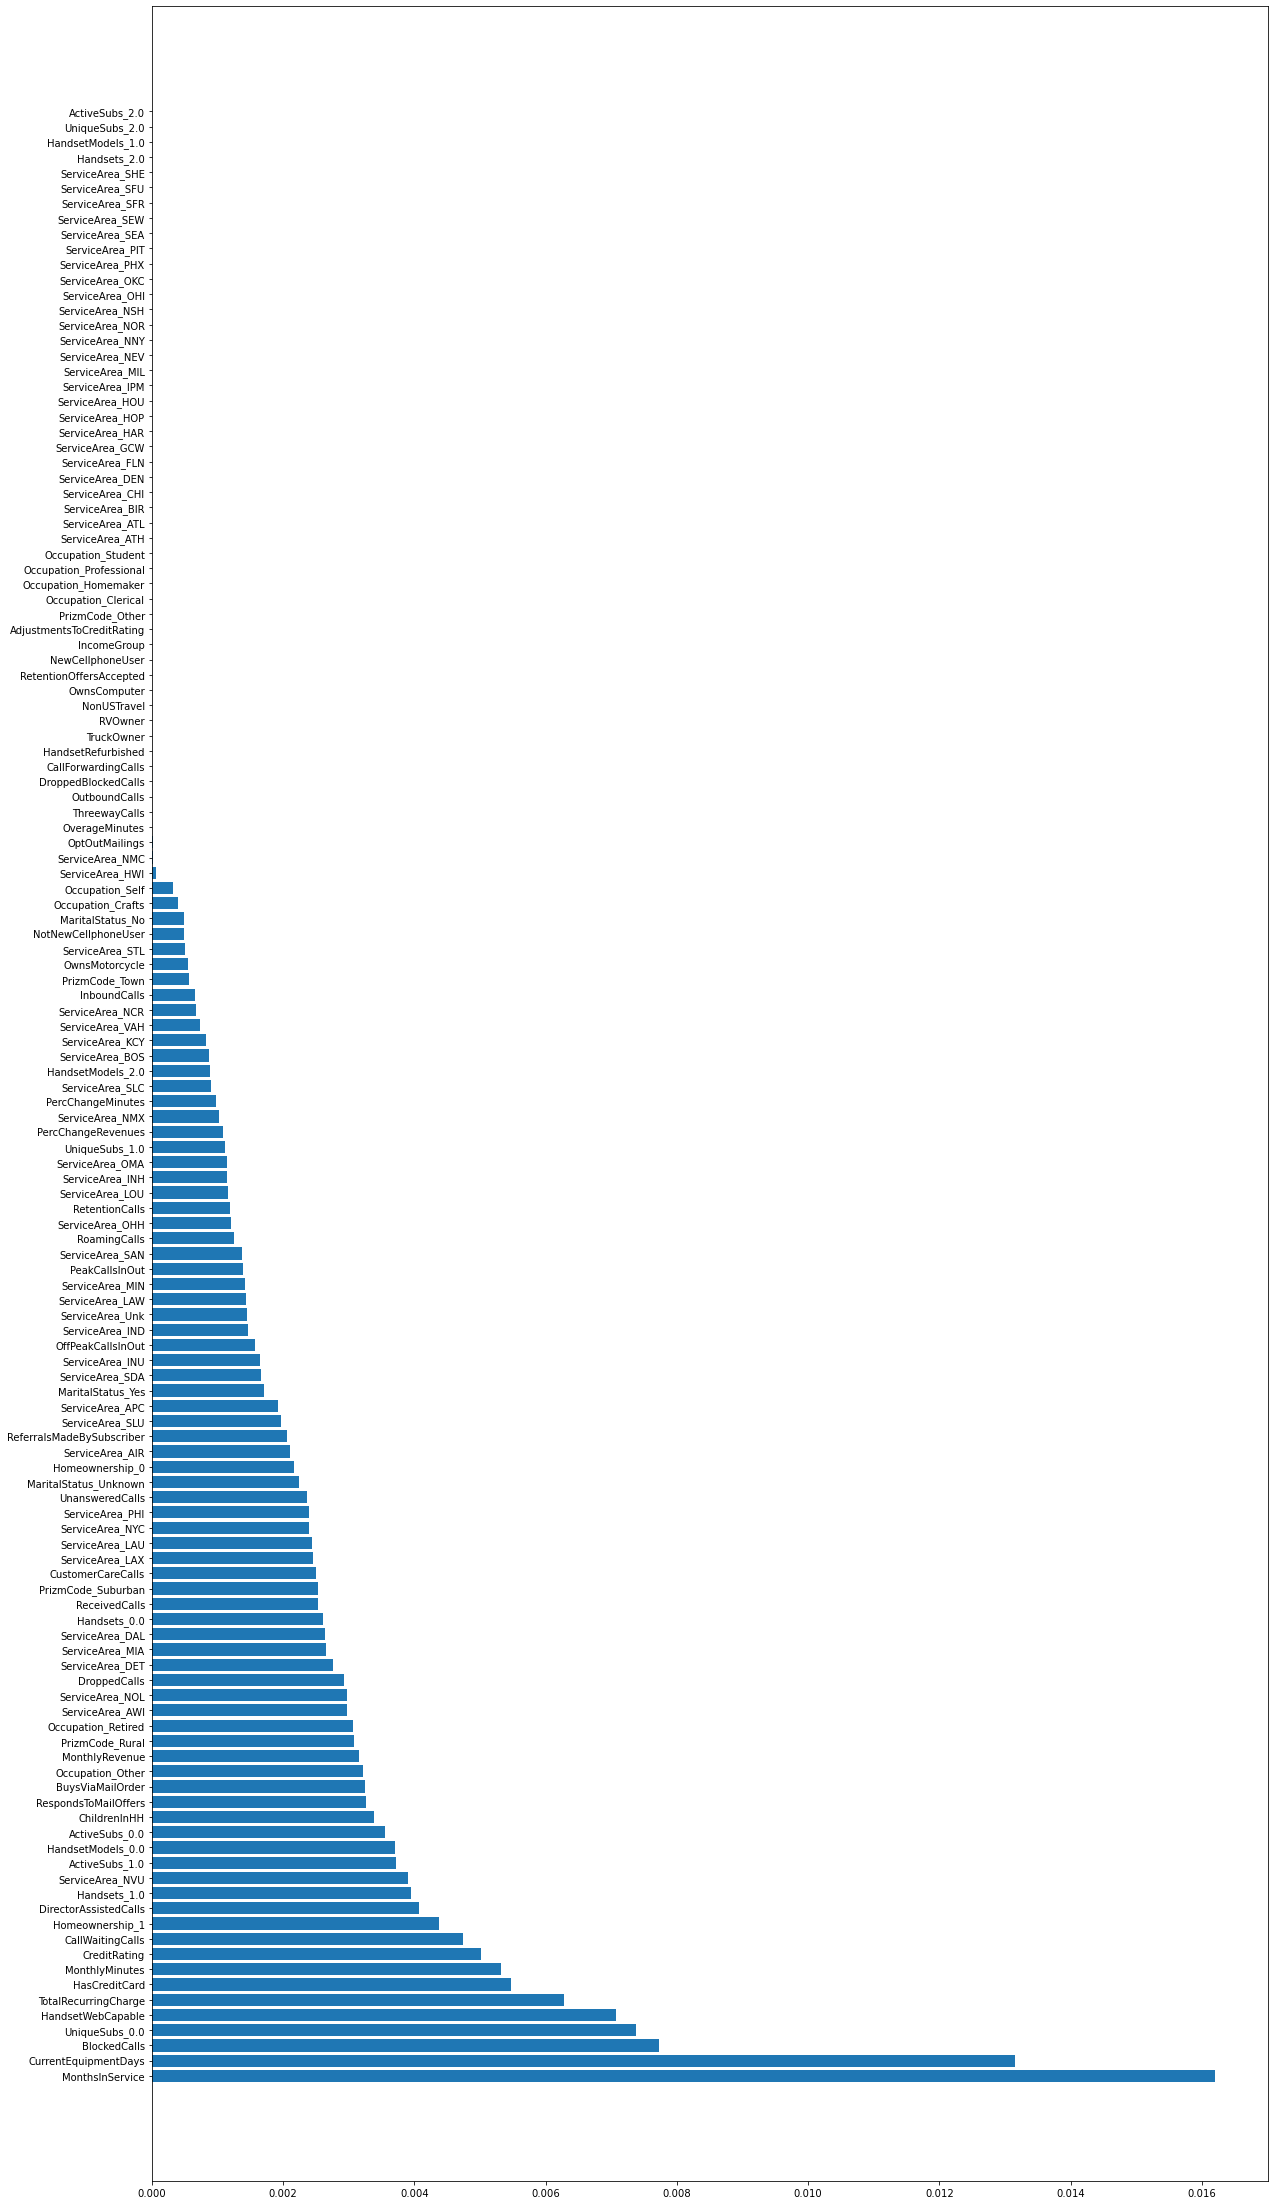

In [109]:
fig, ax = plt.subplots(figsize = (20, 40))
y_pos = np.arange(len(feature_info_sorted))

plt.barh(y_pos, [score for feature, score in feature_info_sorted], align = "center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in feature_info_sorted])
plt.show()

In [118]:
imp_features = {}
for feature, score in feature_info_sorted:
    if score >= 0.003:
        imp_features[feature] = score

In [119]:
imp_features

{'MonthsInService': 0.016194951475507313,
 'CurrentEquipmentDays': 0.013145710377252762,
 'BlockedCalls': 0.007728245016870083,
 'UniqueSubs_0.0': 0.007380667815389597,
 'HandsetWebCapable': 0.007068122218750306,
 'TotalRecurringCharge': 0.00627384895275207,
 'HasCreditCard': 0.005476165092937135,
 'MonthlyMinutes': 0.005315025466025691,
 'CreditRating': 0.005015598285621037,
 'CallWaitingCalls': 0.004738493393484644,
 'Homeownership_1': 0.00436810104747587,
 'DirectorAssistedCalls': 0.004069838651228341,
 'Handsets_1.0': 0.003952452955593877,
 'ServiceArea_NVU': 0.0039040151836737813,
 'ActiveSubs_1.0': 0.003713517091354923,
 'HandsetModels_0.0': 0.003708652292709669,
 'ActiveSubs_0.0': 0.0035511014417144438,
 'ChildrenInHH': 0.0033889897458128093,
 'RespondsToMailOffers': 0.0032631807091576537,
 'BuysViaMailOrder': 0.003246840503069892,
 'Occupation_Other': 0.0032212719545210433,
 'MonthlyRevenue': 0.003157438344985053,
 'PrizmCode_Rural': 0.003081428678116005,
 'Occupation_Retired':

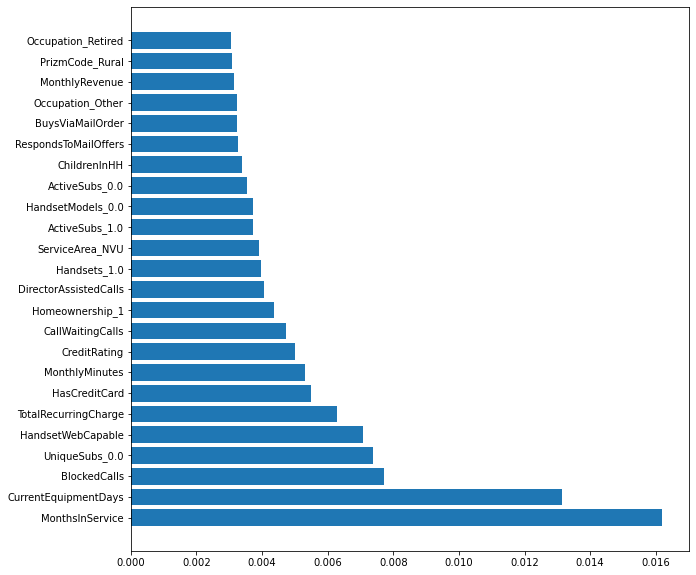

In [133]:
fig, ax = plt.subplots(figsize=(10, 10))

features = list(imp_features.keys())
scores = list(imp_features.values())

ax.barh(features, scores, align="center")

# Set y-ticks to the features
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)

# Display the plot
plt.show()


In [174]:
imp_feature_set = imputed_transformed_set
for col in imputed_transformed_set.columns:
    if (col not in imp_features.keys()):
        if col != 'Churn':
            imp_feature_set = imp_feature_set.drop(col, axis='columns')

imp_feature_set

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,ChildrenInHH,...,PrizmCode_Rural,Occupation_Other,Occupation_Retired,ServiceArea_NVU,Homeownership_1,Handsets_1.0,HandsetModels_0.0,UniqueSubs_0.0,ActiveSubs_0.0,ActiveSubs_1.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1.0,1.471504,1.649164,1.461879,1,1.0,1.0,4.804088,19.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0,0,1,0
3000010,1.0,1.431501,1.359093,1.431573,0,0.0,0.0,4.753664,38.781439,1.0,...,0.0,0.0,0.0,0.0,1.0,1,1,1,1,0
3000014,0.0,1.518010,1.323557,1.518010,0,0.0,0.0,4.787561,42.567593,1.0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0
3000022,0.0,1.583161,1.739869,1.576057,1,1.0,1.0,4.770756,21.400935,0.0,...,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1
3000026,1.0,1.432581,0.000000,1.431573,0,0.0,0.0,4.663528,29.189039,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,1.0,1.565838,1.688625,1.522797,1,1.0,1.0,4.060740,22.934690,0.0,...,0.0,1.0,0.0,0.0,1.0,1,0,1,1,0
3399974,0.0,1.593985,1.751829,1.585615,1,1.0,1.0,4.060740,21.540659,1.0,...,0.0,1.0,0.0,0.0,1.0,1,0,1,1,0
3399978,1.0,1.629760,1.766138,1.608564,1,1.0,1.0,3.912423,19.442222,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0


In [175]:
imp_feature_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51047 entries, 3000002 to 3399994
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  51047 non-null  float64
 1   MonthlyRevenue         51047 non-null  float64
 2   MonthlyMinutes         51047 non-null  float64
 3   TotalRecurringCharge   51047 non-null  float64
 4   DirectorAssistedCalls  51047 non-null  int32  
 5   BlockedCalls           51047 non-null  float64
 6   CallWaitingCalls       51047 non-null  float64
 7   MonthsInService        51047 non-null  float64
 8   CurrentEquipmentDays   51047 non-null  float64
 9   ChildrenInHH           51047 non-null  float64
 10  HandsetWebCapable      51047 non-null  float64
 11  BuysViaMailOrder       51047 non-null  float64
 12  RespondsToMailOffers   51047 non-null  float64
 13  HasCreditCard          51047 non-null  float64
 14  CreditRating           51047 non-null  float64

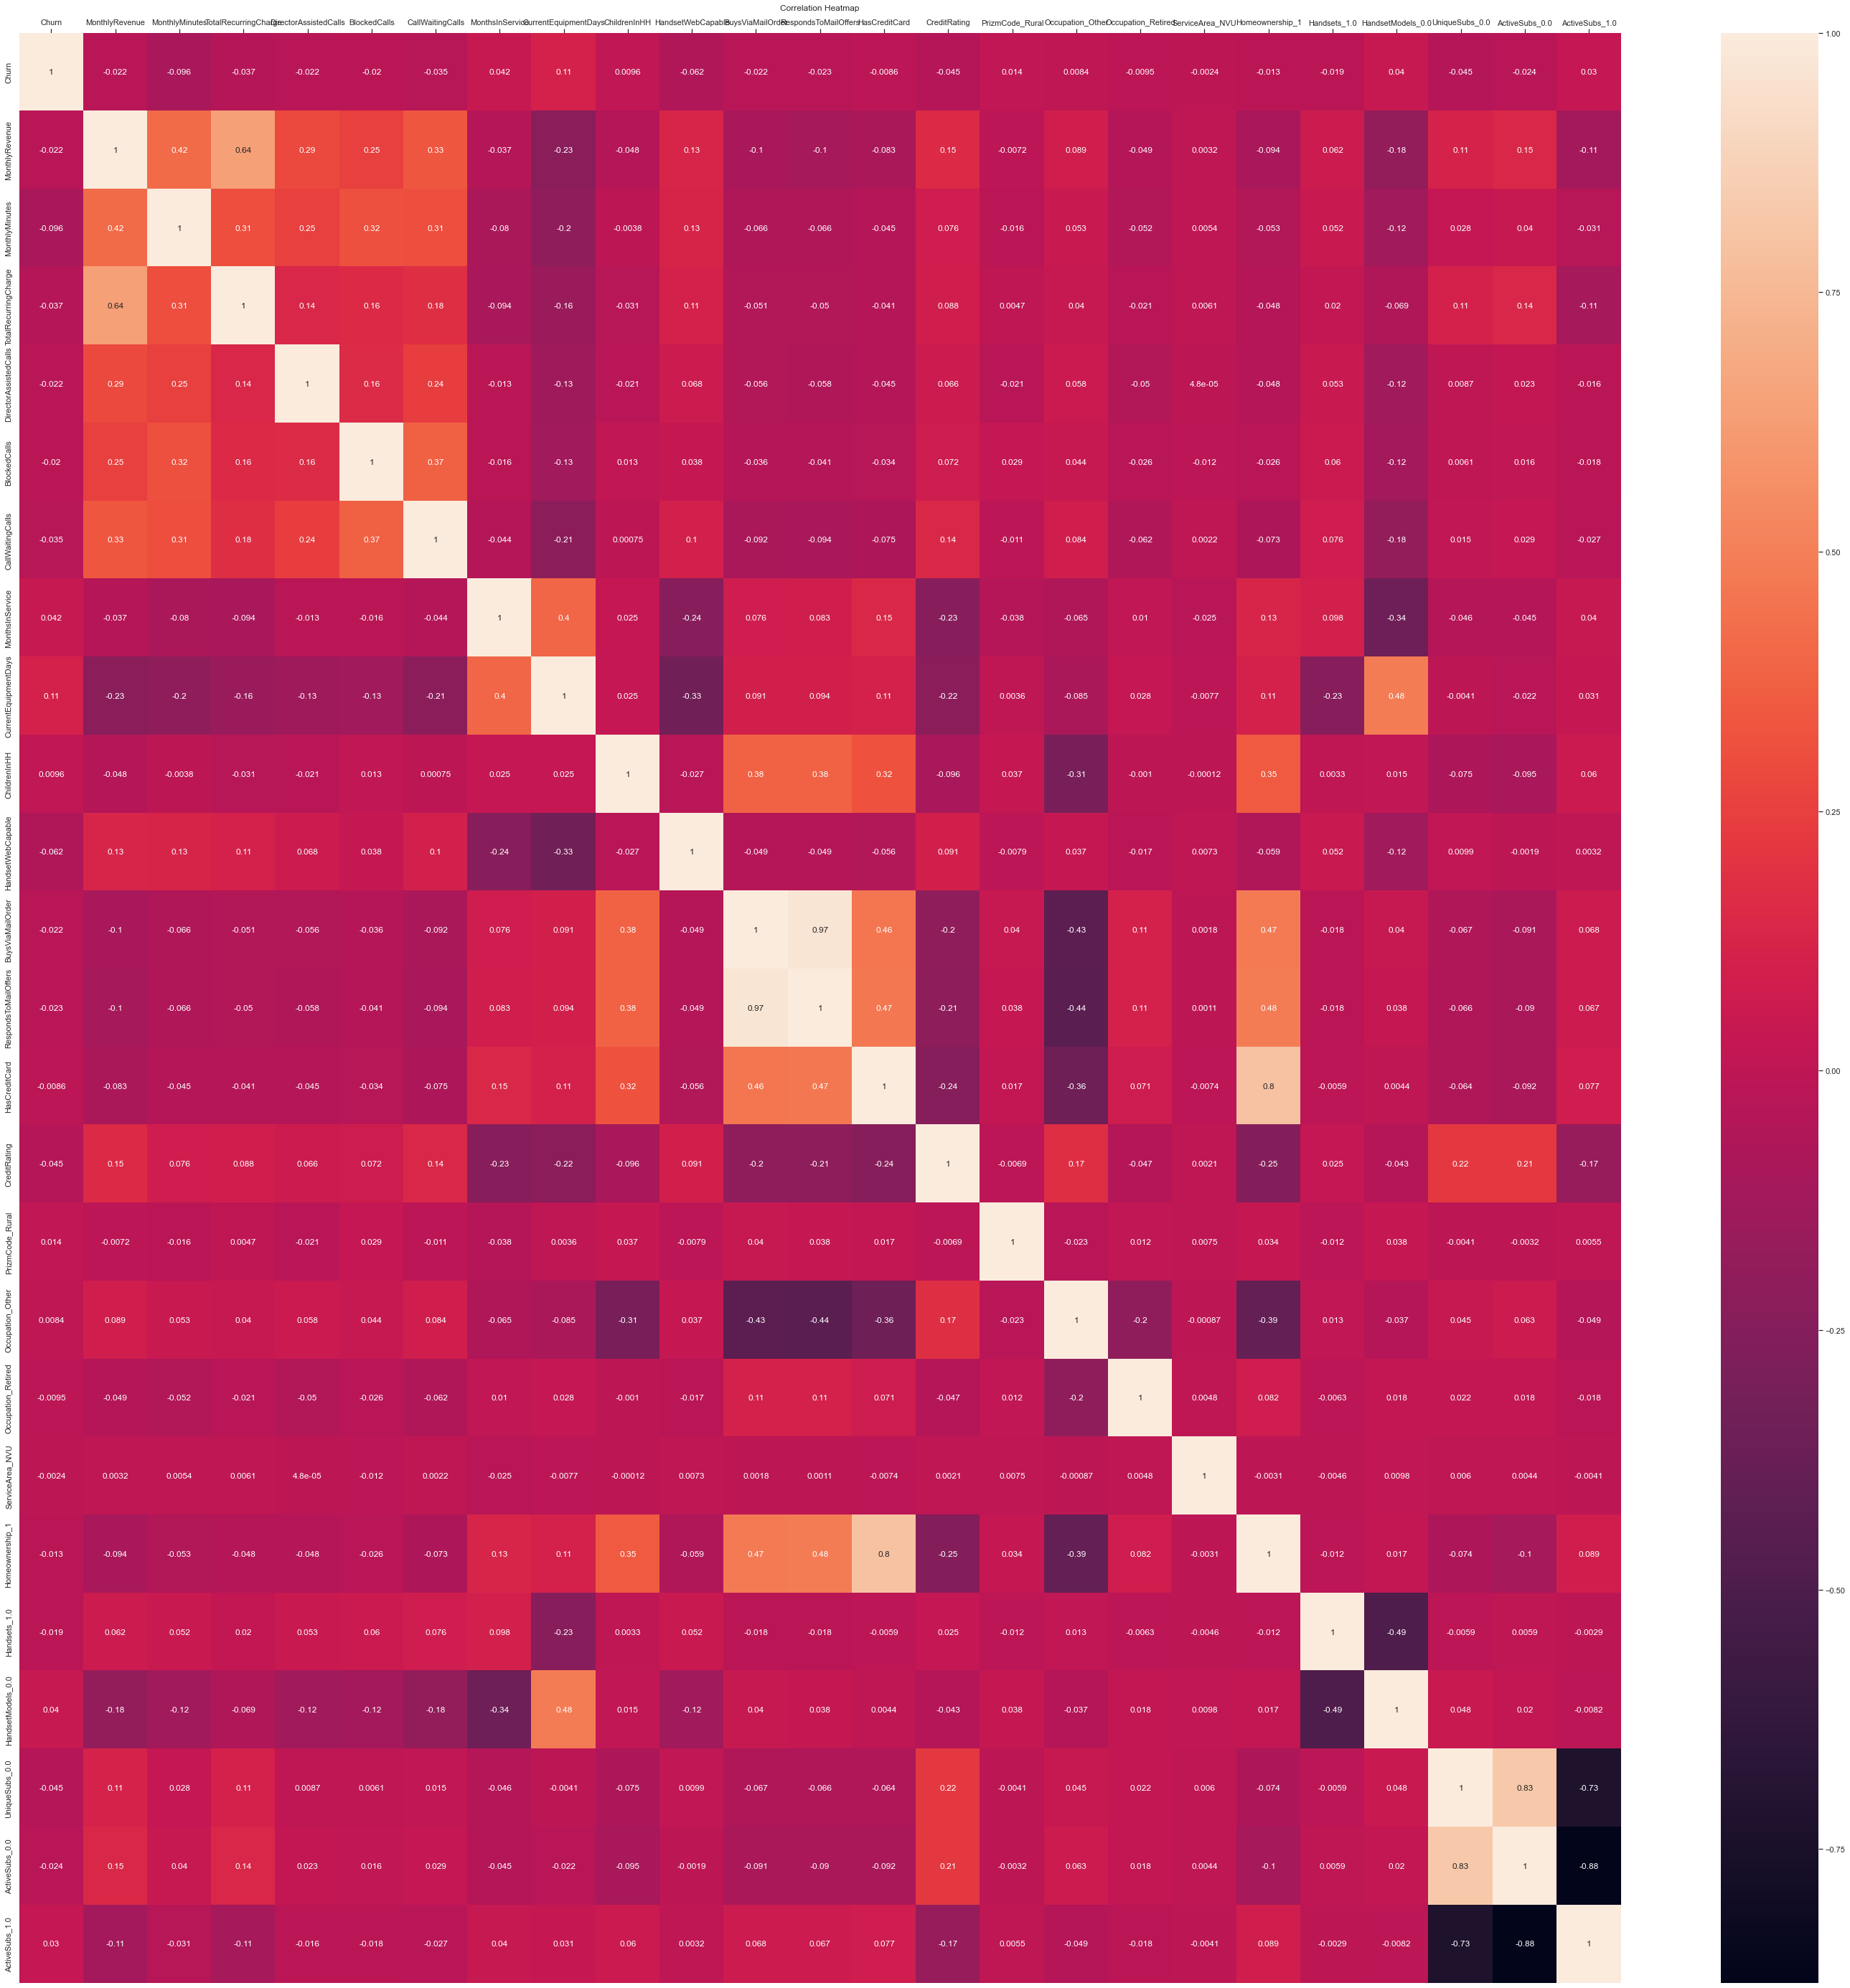

In [176]:
sns.set_theme(rc={'figure.figsize':(50, 50)})
heatmap = sns.heatmap(imp_feature_set.corr(), annot=True, cbar=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
heatmap.xaxis.tick_top()
plt.show()

In [177]:
imp_feature_set = imp_feature_set.drop('ActiveSubs_0.0', axis='columns')
imp_feature_set = imp_feature_set.drop('Handsets_1.0', axis='columns')
imp_feature_set = imp_feature_set.drop('Homeownership_1', axis='columns')
imp_feature_set = imp_feature_set.drop('RespondsToMailOffers', axis='columns')
imp_feature_set = imp_feature_set.drop('TotalRecurringCharge', axis='columns')
imp_feature_set.corr()

,Churn,MonthlyRevenue,MonthlyMinutes,DirectorAssistedCalls,BlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,ChildrenInHH,HandsetWebCapable,BuysViaMailOrder,HasCreditCard,CreditRating,PrizmCode_Rural,Occupation_Other,Occupation_Retired,ServiceArea_NVU,HandsetModels_0.0,UniqueSubs_0.0,ActiveSubs_1.0
Churn,1.000000,-0.021604,-0.096480,-0.021533,-0.019891,-0.034609,0.041872,0.109021,0.009562,-0.062096,-0.021725,-0.008618,-0.044750,0.014264,0.008409,-0.009540,-0.002355,0.039512,-0.044978,0.029546
MonthlyRevenue,-0.021604,1.000000,0.419622,0.285685,0.249170,0.333791,-0.036583,-0.231839,-0.048350,0.126951,-0.100062,-0.082800,0.152714,-0.007235,0.088888,-0.049052,0.003224,-0.183461,0.114627,-0.113742
MonthlyMinutes,-0.096480,0.419622,1.000000,0.249961,0.315705,0.305690,-0.080006,-0.199739,-0.003773,0.125521,-0.065645,-0.044946,0.075687,-0.016258,0.052900,-0.052251,0.005423,-0.123406,0.028459,-0.030905
DirectorAssistedCalls,-0.021533,0.285685,0.249961,1.000000,0.157454,0.237792,-0.013063,-0.133991,-0.020857,0.067672,-0.056432,-0.045327,0.065896,-0.021448,0.058498,-0.050214,0.000048,-0.124811,0.008700,-0.015957
BlockedCalls,-0.019891,0.249170,0.315705,0.157454,1.000000,0.371728,-0.015937,-0.126235,0.013214,0.037601,-0.035944,-0.034103,0.071926,0.028727,0.043519,-0.025973,-0.012302,-0.120690,0.006081,-0.017509
CallWaitingCalls,-0.034609,0.333791,0.305690,0.237792,0.371728,1.000000,-0.043860,-0.211143,0.000749,0.100177,-0.091783,-0.074662,0.142678,-0.011052,0.083779,-0.061794,0.002228,-0.183078,0.015125,-0.026897
MonthsInService,0.041872,-0.036583,-0.080006,-0.013063,-0.015937,-0.043860,1.000000,0.396674,0.024548,-0.238997,0.076229,0.147172,-0.234509,-0.038416,-0.064534,0.010271,-0.025083,-0.344779,-0.045982,0.040008
CurrentEquipmentDays,0.109021,-0.231839,-0.199739,-0.133991,-0.126235,-0.211143,0.396674,1.000000,0.025237,-0.334683,0.091037,0.109361,-0.220875,0.003592,-0.084707,0.028377,-0.007730,0.479417,-0.004081,0.031490
ChildrenInHH,0.009562,-0.048350,-0.003773,-0.020857,0.013214,0.000749,0.024548,0.025237,1.000000,-0.026504,0.378537,0.324064,-0.095926,0.037282,-0.306148,-0.000998,-0.000118,0.015453,-0.075393,0.060161
HandsetWebCapable,-0.062096,0.126951,0.125521,0.067672,0.037601,0.100177,-0.238997,-0.334683,-0.026504,1.000000,-0.049433,-0.056290,0.090761,-0.007877,0.037171,-0.017276,0.007295,-0.124609,0.009914,0.003161


# Finding Clusters

In [179]:
imp_feature_set = imp_feature_set.astype(float)

In [180]:
imp_feature_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51047 entries, 3000002 to 3399994
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  51047 non-null  float64
 1   MonthlyRevenue         51047 non-null  float64
 2   MonthlyMinutes         51047 non-null  float64
 3   DirectorAssistedCalls  51047 non-null  float64
 4   BlockedCalls           51047 non-null  float64
 5   CallWaitingCalls       51047 non-null  float64
 6   MonthsInService        51047 non-null  float64
 7   CurrentEquipmentDays   51047 non-null  float64
 8   ChildrenInHH           51047 non-null  float64
 9   HandsetWebCapable      51047 non-null  float64
 10  BuysViaMailOrder       51047 non-null  float64
 11  HasCreditCard          51047 non-null  float64
 12  CreditRating           51047 non-null  float64
 13  PrizmCode_Rural        51047 non-null  float64
 14  Occupation_Other       51047 non-null  float64

# Model Training

In [186]:
from sklearn.model_selection import train_test_split
y = imp_feature_set['Churn']
X = imp_feature_set.drop('Churn', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [189]:
y_pred = model.predict(X_test)

In [193]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7196865817825661


### Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [195]:
y_pred = model.predict(X_test)
# Evaluate the model's performance using appropriate evaluation metrics
# Example: Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7069539666993144


### Hyperparameter Tuning

In [196]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

In [197]:
# Define the hyperparameters for logistic regression
hyperparameters = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

In [198]:
from sklearn.model_selection import GridSearchCV

# Perform grid search cross-validation
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']})

In [199]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}


In [200]:
# Train the model with the best hyperparameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200)

In [201]:
from sklearn.metrics import classification_report

# Generate predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.99      0.83      7308
         1.0       0.60      0.04      0.07      2902

    accuracy                           0.72     10210
   macro avg       0.66      0.51      0.45     10210
weighted avg       0.69      0.72      0.62     10210



In [203]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [204]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
parameters = {'C': [0.1, 1, 10]}

# Creating a GridSearchCV object
grid_search = GridSearchCV(classifier, parameters)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.5139554209636674

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = {'TF-IDF':[]}

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds.round())
accuracy['TF-IDF'].append(lr_acc)


lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_preds = lgr.predict(X_test)
lgr_acc = accuracy_score(y_test, lgr_preds)
accuracy['TF-IDF'].append(lgr_acc)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
accuracy['TF-IDF'].append(dt_acc)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
accuracy['TF-IDF'].append(rf_acc)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
accuracy['TF-IDF'].append(knn_acc)

print(f"Linear Regression Accuracy: {lr_acc}")
print(f"Logistic Regression Accuracy: {lgr_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"KNN Accuracy: {knn_acc}")


Linear Regression Accuracy: 0.7204701273261508
Logistic Regression Accuracy: 0.7196865817825661
Decision Tree Accuracy: 0.6065621939275221
Random Forest Accuracy: 0.7107737512242899
KNN Accuracy: 0.6697355533790401
